In [1]:
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
J = 1
B = 0
t = np.linspace(1,4,1000)
beta = 1/t
Tc = 2/np.log(1+np.sqrt(2))

In [3]:
def get_eigval(L,beta,J):
    w = np.zeros((2**L,0))
    for Beta in beta:
        M = np.array([[np.sqrt(np.cosh(Beta*J)),np.sqrt(np.sinh(Beta*J))],[np.sqrt(np.cosh(Beta*J)),-np.sqrt(np.sinh(Beta*J))]])
        Y = np.einsum('ai,aj,ak,al->ijkl',M,M,M,M)
        T_L = Y.copy()
        for i in range(1,L-1):
            T_L = np.tensordot(T_L,Y,axes = ([2],[0]))
            T_L = T_L.transpose(0,1,3,4,2,5)
            T_L = T_L.reshape(2,2**(i+1),2,2**(i+1))
        T_L = np.tensordot(T_L,Y,axes = ([0,2],[2,0]))
        T_L = T_L.transpose(0,2,1,3)
        T_L = T_L.reshape(2**(L),2**(L))
        w = np.c_[w,np.linalg.eigvalsh(T_L)]
    return w.transpose()

𝜆 和 𝐸 的圖片實線是透過Matrix算得的數值，虛線是T matrix算出的數值

# L=1
$$\displaystyle \left[\begin{matrix}e^{\beta \left(B + J\right)} & e^{- J \beta}\\e^{- J \beta} & e^{\beta \left(- B + J\right)}\end{matrix}\right]$$

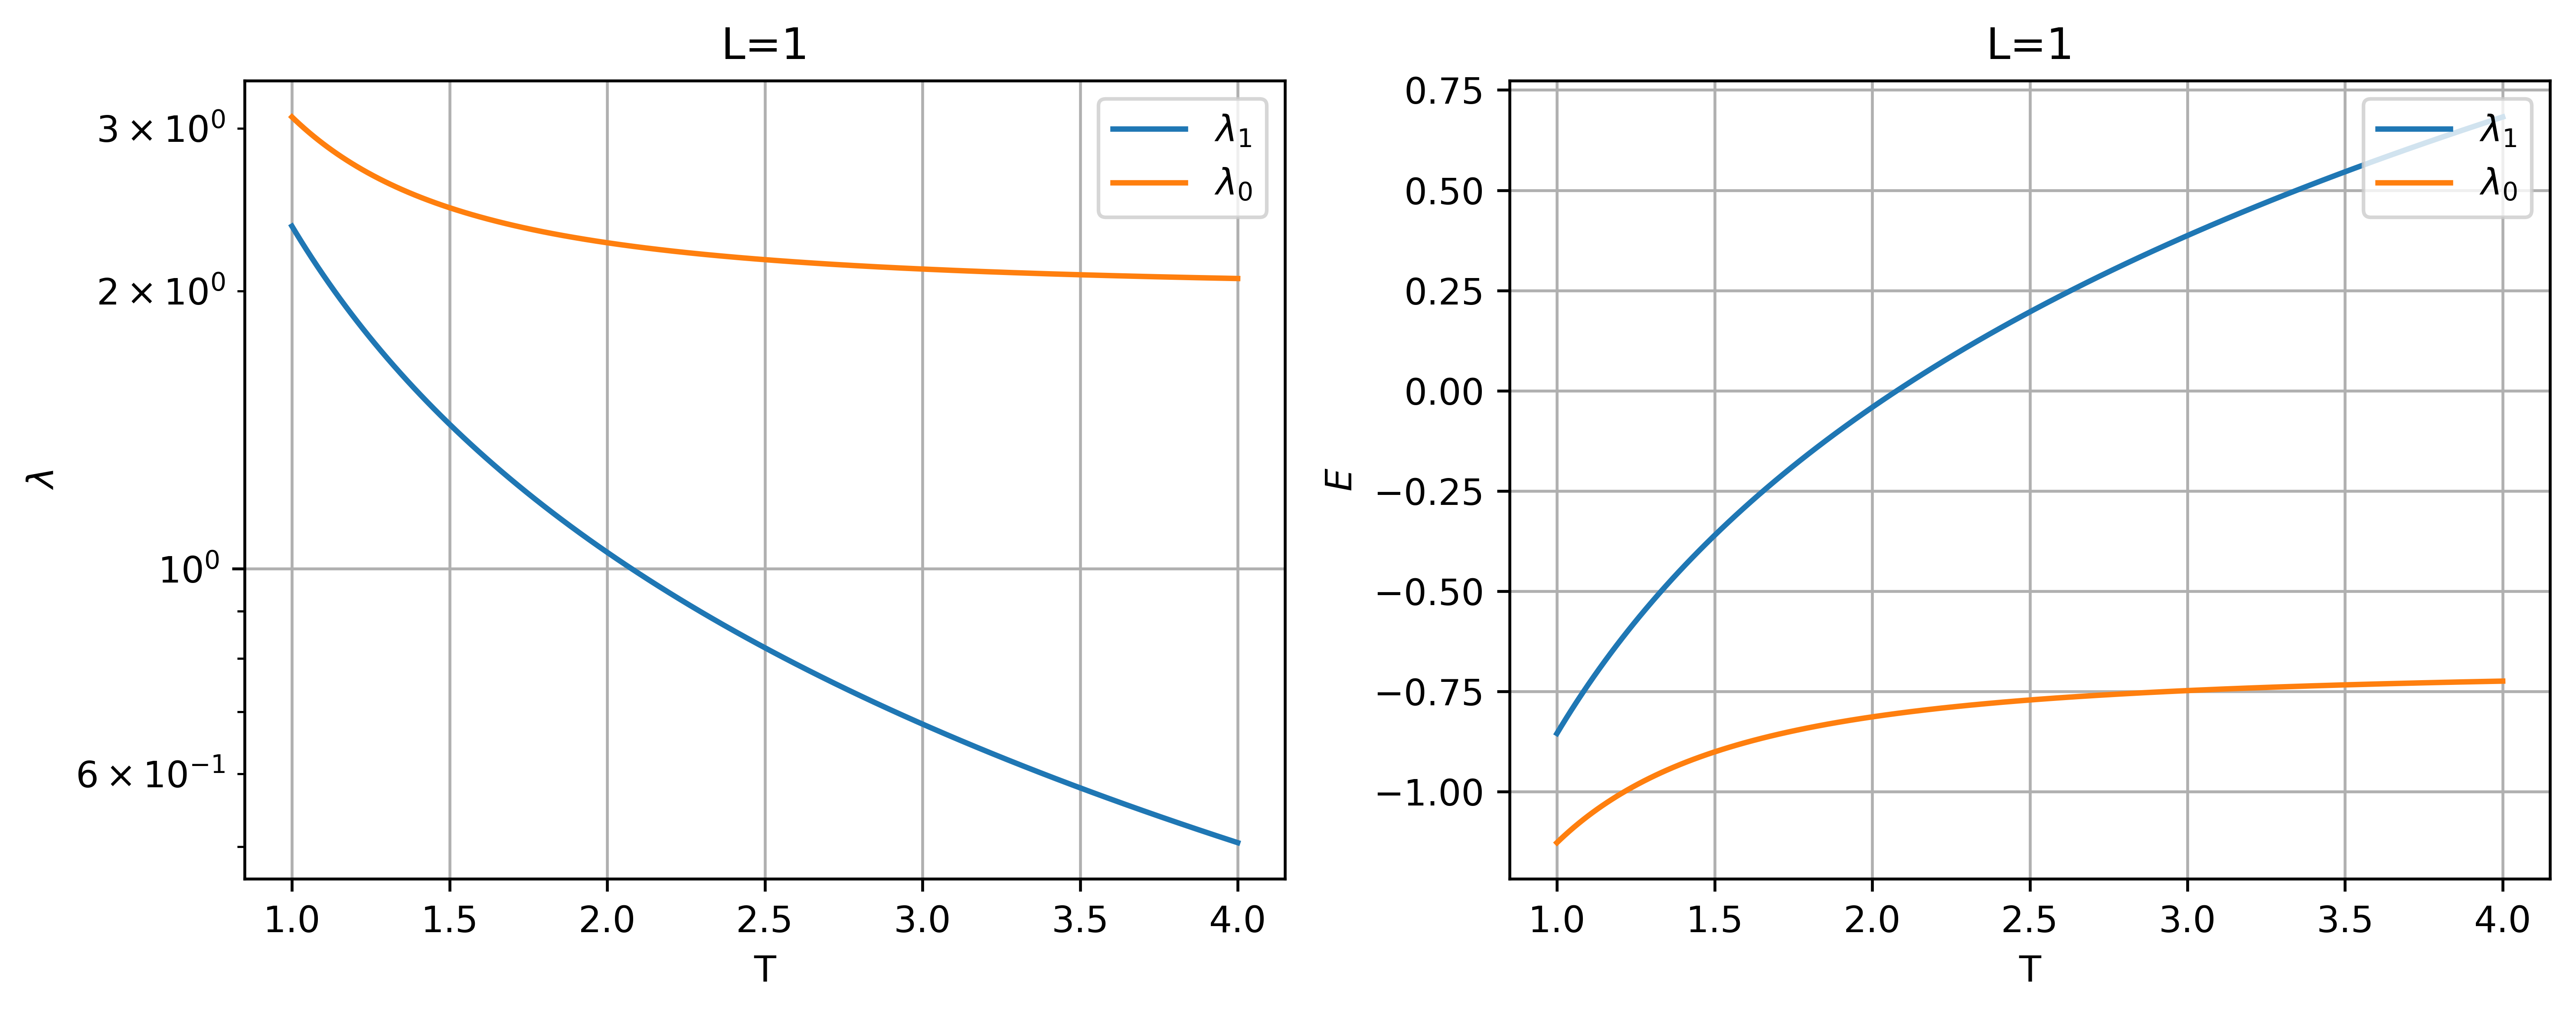

In [4]:
def get_T_1(J,B,beta):
    return np.exp(beta.reshape(-1,1,1) * np.array(
            [[((J+B)),(-J)],
            [(-J),((J-B))]]))

T_1 = get_T_1(J,B,beta)
w_1 = np.linalg.eigvalsh(T_1)
plt.figure(figsize = (10,4),dpi = 600)
plt.subplot(1,2,1)
plt.plot(t,w_1[:,0],label = r'$\lambda_1$')
plt.plot(t,w_1[:,1],label = r'$\lambda_0$')
plt.yscale('log')
plt.xlabel('T')
plt.ylabel(r'$\lambda$')
plt.title('L=1')
plt.grid()
plt.legend(loc = 1)
E_1 = -np.log(w_1)
plt.subplot(1,2,2)
plt.plot(t,E_1[:,0],label = r'$\lambda_1$')
plt.plot(t,E_1[:,1],label = r'$\lambda_0$')
plt.xlabel('T')
plt.ylabel('$E$')
plt.title('L=1')
plt.grid()
plt.legend(loc = 1)
plt.tight_layout()
plt.show()

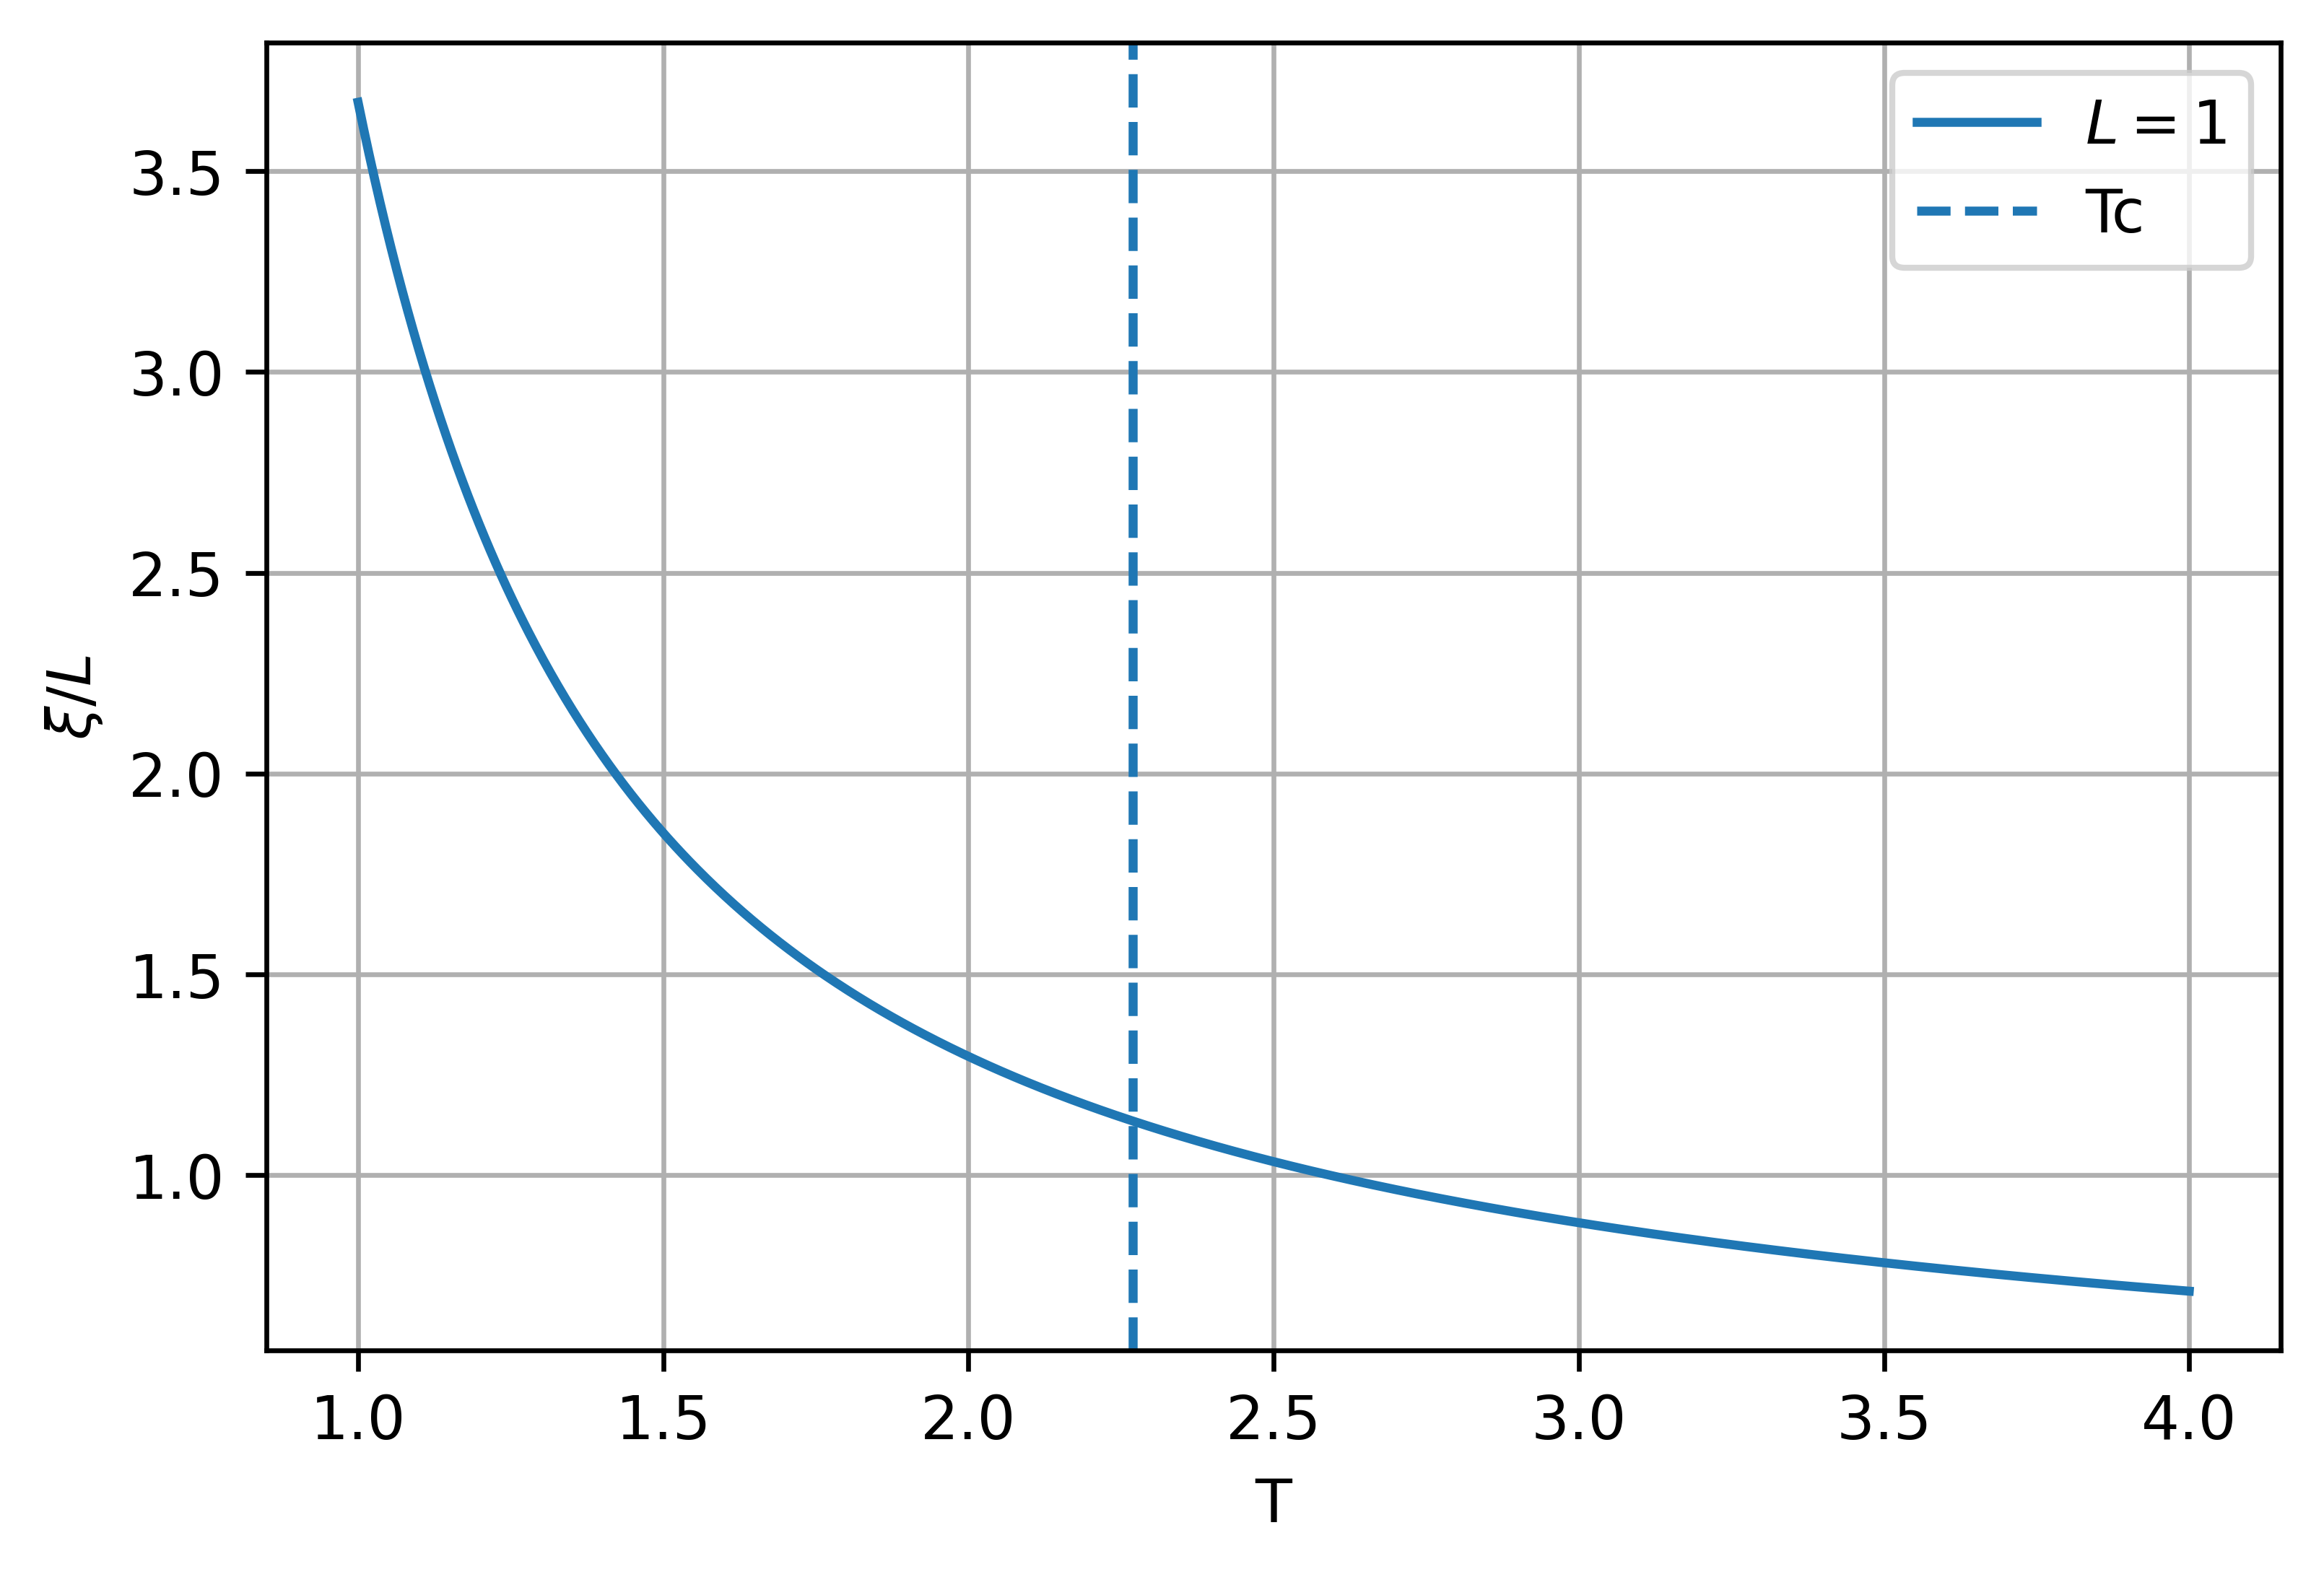

In [5]:
Corr_len_1 = 1/(E_1[:,-2]-E_1[:,-1])
plt.figure(dpi = 600)
plt.plot(t,Corr_len_1,label = r'$L=1$')
plt.axvline(x=Tc,ls='--',label = 'Tc')
plt.xlabel('T')
plt.ylabel(r'$\xi/L$')
#plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

# L=2
$$\displaystyle\left[\begin{matrix}e^{2 \beta \left(B + 2 J\right)} & e^{B \beta} & e^{B \beta} & 1\\e^{B \beta} & 1 & e^{- 4 J \beta} & e^{- B \beta}\\e^{B \beta} & e^{- 4 J \beta} & 1 & e^{- B \beta}\\1 & e^{- B \beta} & e^{- B \beta} & e^{2 \beta \left(- B + 2 J\right)}\end{matrix}\right]$$

True


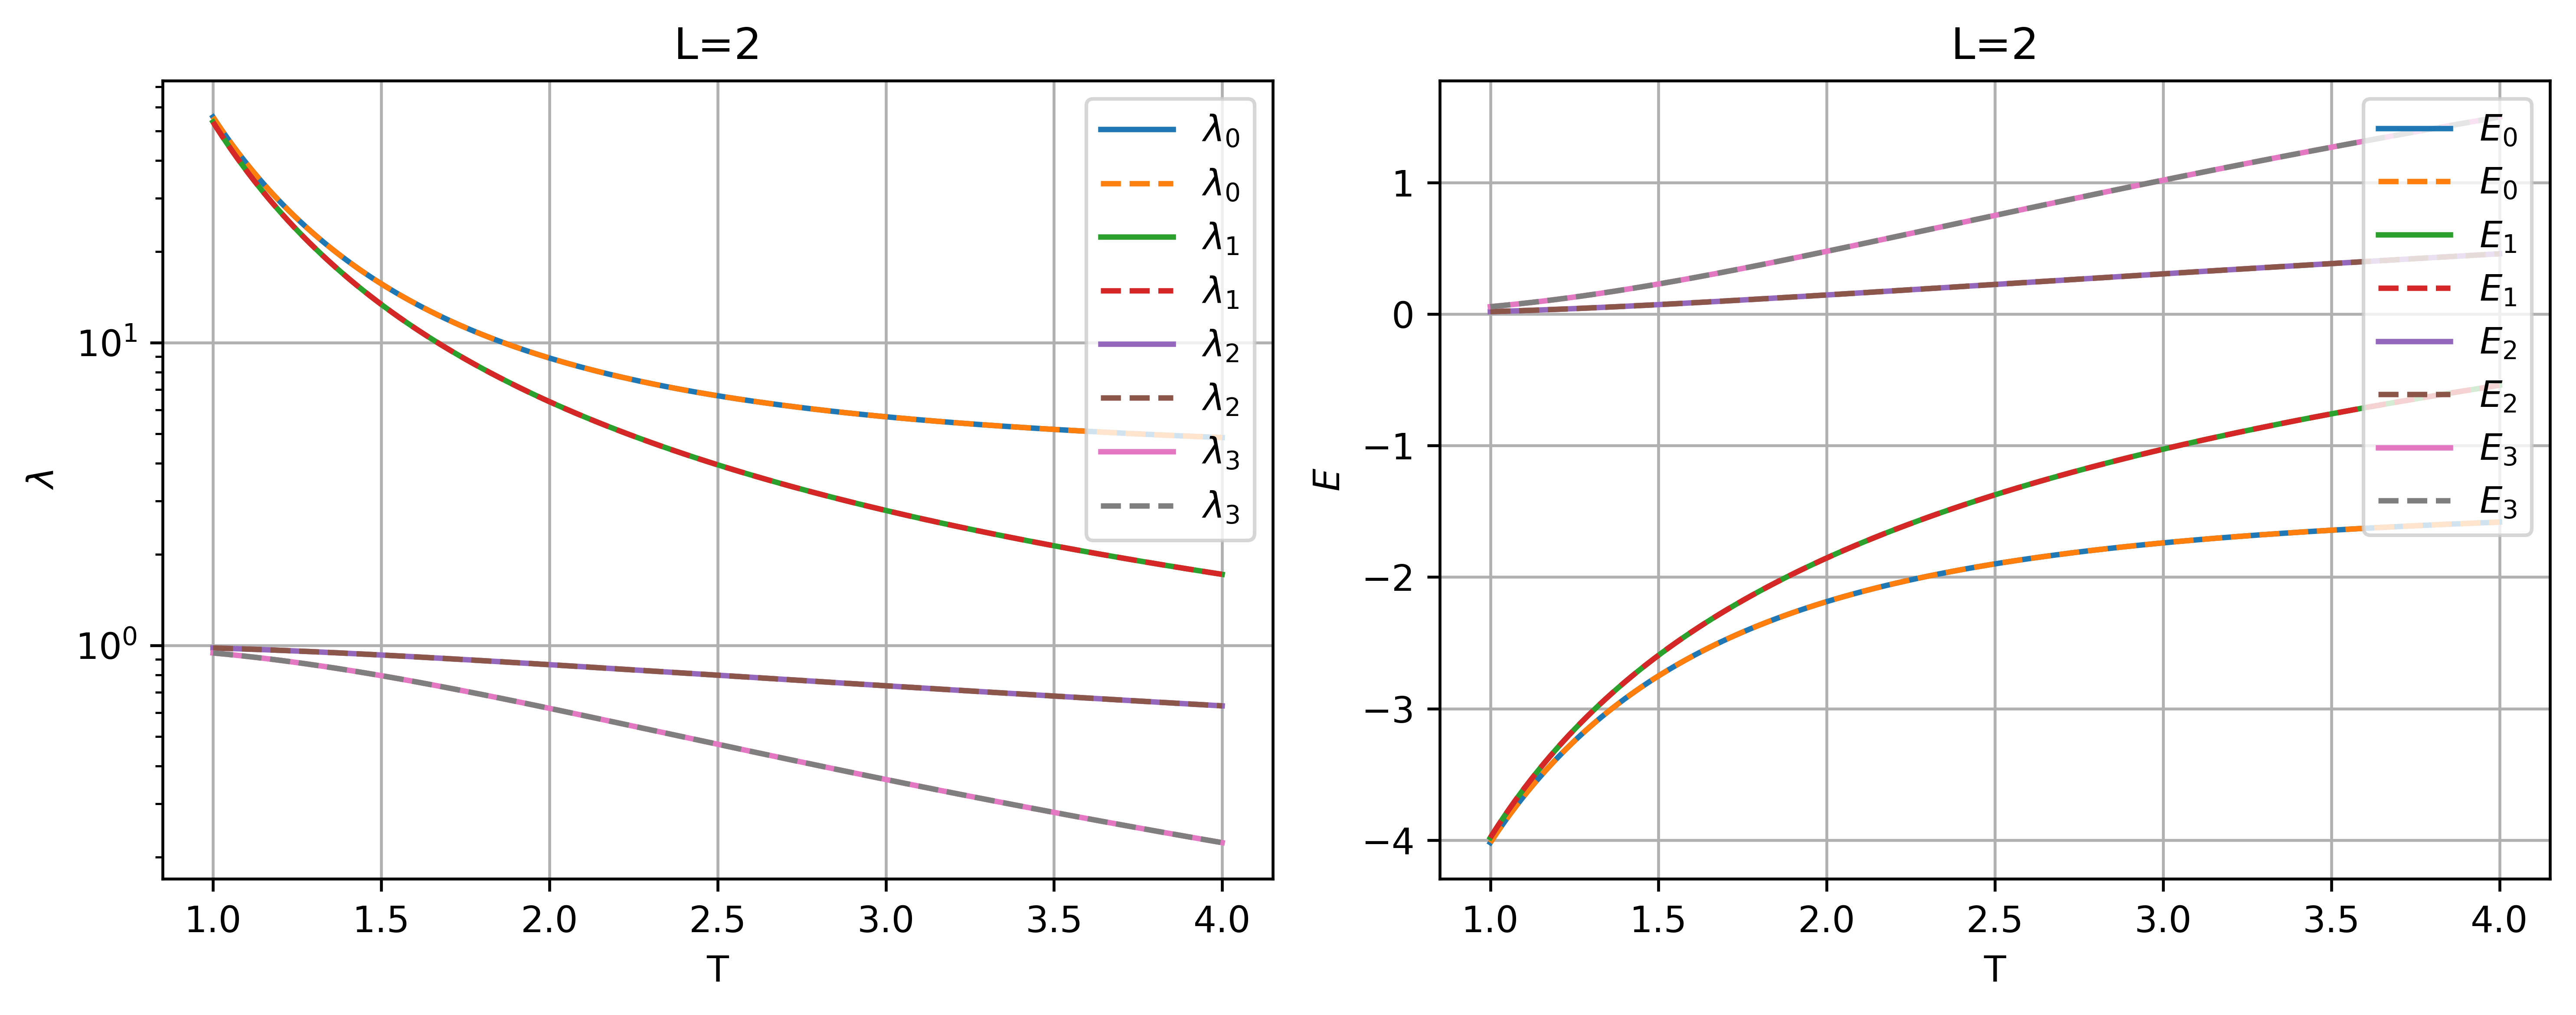

In [6]:
def get_T_2(J,B,beta):
    return np.exp(beta.reshape(-1,1,1) *  np.array(
            [[2*B + 4*J, B, B, 0],
            [B, 0, -4*J, -B],
            [B, -4*J, 0, -B],
            [0, -B, -B, -2*B + 4*J]]))

T_2 = get_T_2(J,B,beta)
w_2 = np.linalg.eigvalsh(T_2)
w_2_2 = get_eigval(2,beta,J)
print(np.allclose(w_2_2,w_2))
plt.figure(figsize = (10,4),dpi = 600)
plt.subplot(1,2,1)
for i in range(4):
    plt.plot(t,w_2[:,-(i+1)],label = f'$\lambda_{i}$')
    plt.plot(t,w_2_2[:,-(i+1)],'--',label = f'$\lambda_{i}$')
plt.yscale('log')
plt.xlabel('T')
plt.ylabel(r'$\lambda$')
plt.title('L=2')
plt.grid()
plt.legend(loc=1)
E_2 = -np.log(w_2)
E_2_2 = -np.log(w_2_2)
plt.subplot(1,2,2)
for i in range(4):
    plt.plot(t,E_2[:,-(i+1)],label = f'$E_{i}$')
    plt.plot(t,E_2_2[:,-(i+1)],'--',label = f'$E_{i}$')
plt.xlabel('T')
plt.ylabel('$E$')
plt.title('L=2')
plt.grid()
plt.legend(loc = 1)
plt.tight_layout()
plt.show()

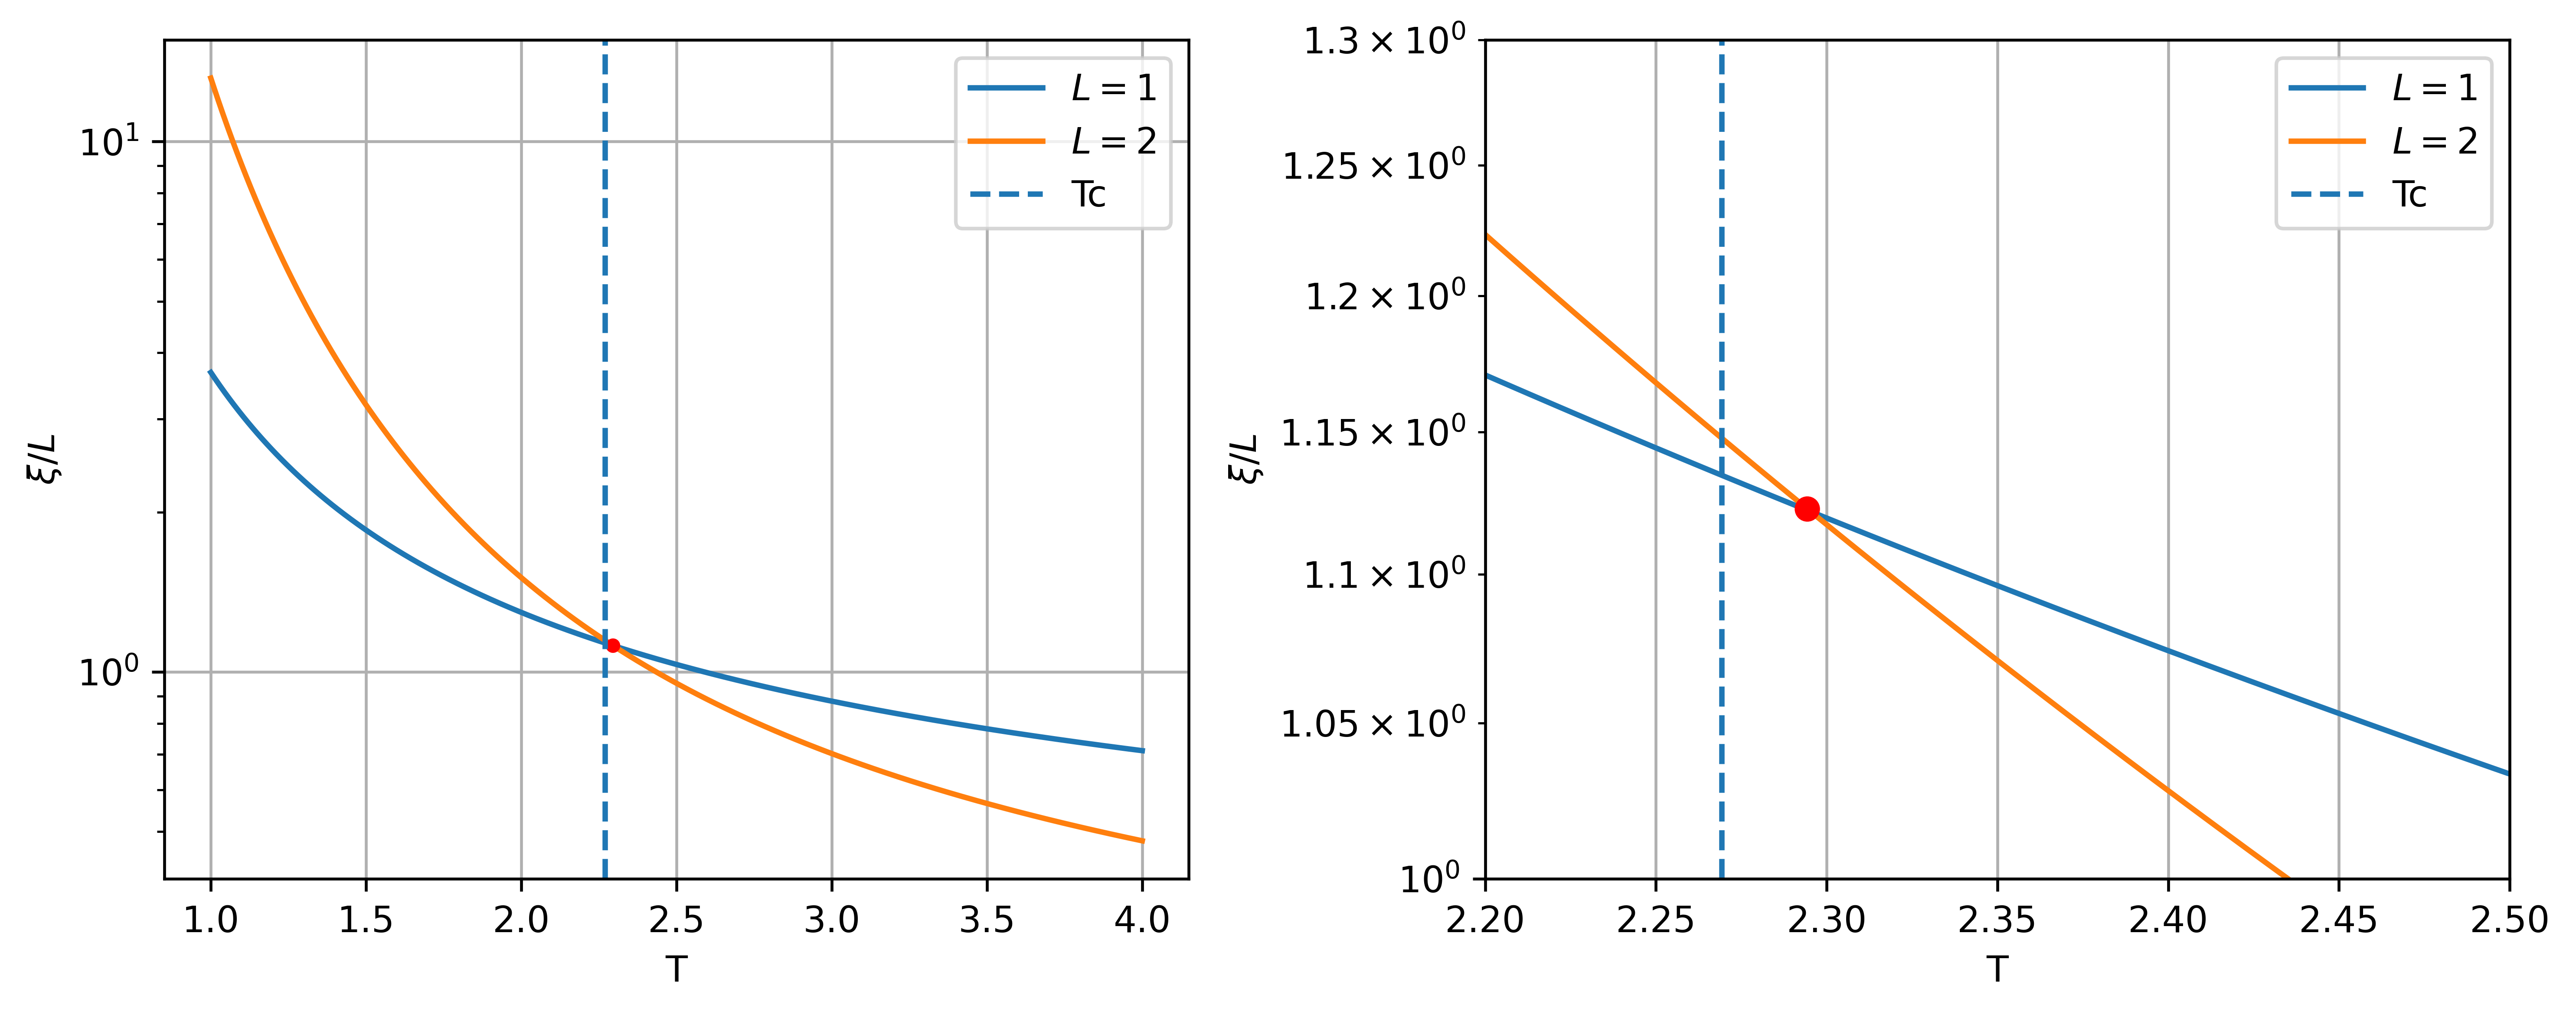

In [7]:
Corr_len_2 = 1/(E_2[:,-2]-E_2[:,-1])/2
T_star = t[np.argmin(np.abs(Corr_len_1-Corr_len_2))]
plt.figure(figsize = (10,4),dpi = 600)
plt.subplot(1,2,1)
plt.plot(t,Corr_len_1,label = r'$L=1$')
plt.plot(t,Corr_len_2,label = r'$L=2$')
plt.plot(t[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         Corr_len_2[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         '.r')
plt.axvline(x=Tc,ls='--',label = 'Tc')
plt.xlabel('T')
plt.ylabel(r'$\xi/L$')
plt.yscale('log')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(t,Corr_len_1,label = r'$L=1$')
plt.plot(t,Corr_len_2,label = r'$L=2$')
plt.plot(t[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         Corr_len_2[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         'or')
plt.axvline(x=Tc,ls='--',label = 'Tc')
plt.xlabel('T')
plt.ylabel(r'$\xi/L$')
plt.yscale('log')
plt.xlim(2.2,2.5)
plt.ylim(1,1.3)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# L=3
$$\displaystyle \left[\begin{matrix}e^{3 \beta \left(B + 2 J\right)} & e^{2 \beta \left(B + J\right)} & e^{2 \beta \left(B + J\right)} & e^{B \beta} & e^{2 \beta \left(B + J\right)} & e^{B \beta} & e^{B \beta} & 1\\e^{2 \beta \left(B + J\right)} & e^{\beta \left(B + 2 J\right)} & e^{\beta \left(B - 2 J\right)} & 1 & e^{\beta \left(B - 2 J\right)} & 1 & e^{- 4 J \beta} & e^{- B \beta}\\e^{2 \beta \left(B + J\right)} & e^{\beta \left(B - 2 J\right)} & e^{\beta \left(B + 2 J\right)} & 1 & e^{\beta \left(B - 2 J\right)} & e^{- 4 J \beta} & 1 & e^{- B \beta}\\e^{B \beta} & 1 & 1 & e^{\beta \left(- B + 2 J\right)} & e^{- 4 J \beta} & e^{\beta \left(- B - 2 J\right)} & e^{\beta \left(- B - 2 J\right)} & e^{2 \beta \left(- B + J\right)}\\e^{2 \beta \left(B + J\right)} & e^{\beta \left(B - 2 J\right)} & e^{\beta \left(B - 2 J\right)} & e^{- 4 J \beta} & e^{\beta \left(B + 2 J\right)} & 1 & 1 & e^{- B \beta}\\e^{B \beta} & 1 & e^{- 4 J \beta} & e^{\beta \left(- B - 2 J\right)} & 1 & e^{\beta \left(- B + 2 J\right)} & e^{\beta \left(- B - 2 J\right)} & e^{2 \beta \left(- B + J\right)}\\e^{B \beta} & e^{- 4 J \beta} & 1 & e^{\beta \left(- B - 2 J\right)} & 1 & e^{\beta \left(- B - 2 J\right)} & e^{\beta \left(- B + 2 J\right)} & e^{2 \beta \left(- B + J\right)}\\1 & e^{- B \beta} & e^{- B \beta} & e^{2 \beta \left(- B + J\right)} & e^{- B \beta} & e^{2 \beta \left(- B + J\right)} & e^{2 \beta \left(- B + J\right)} & e^{3 \beta \left(- B + 2 J\right)}\end{matrix}\right]$$

True


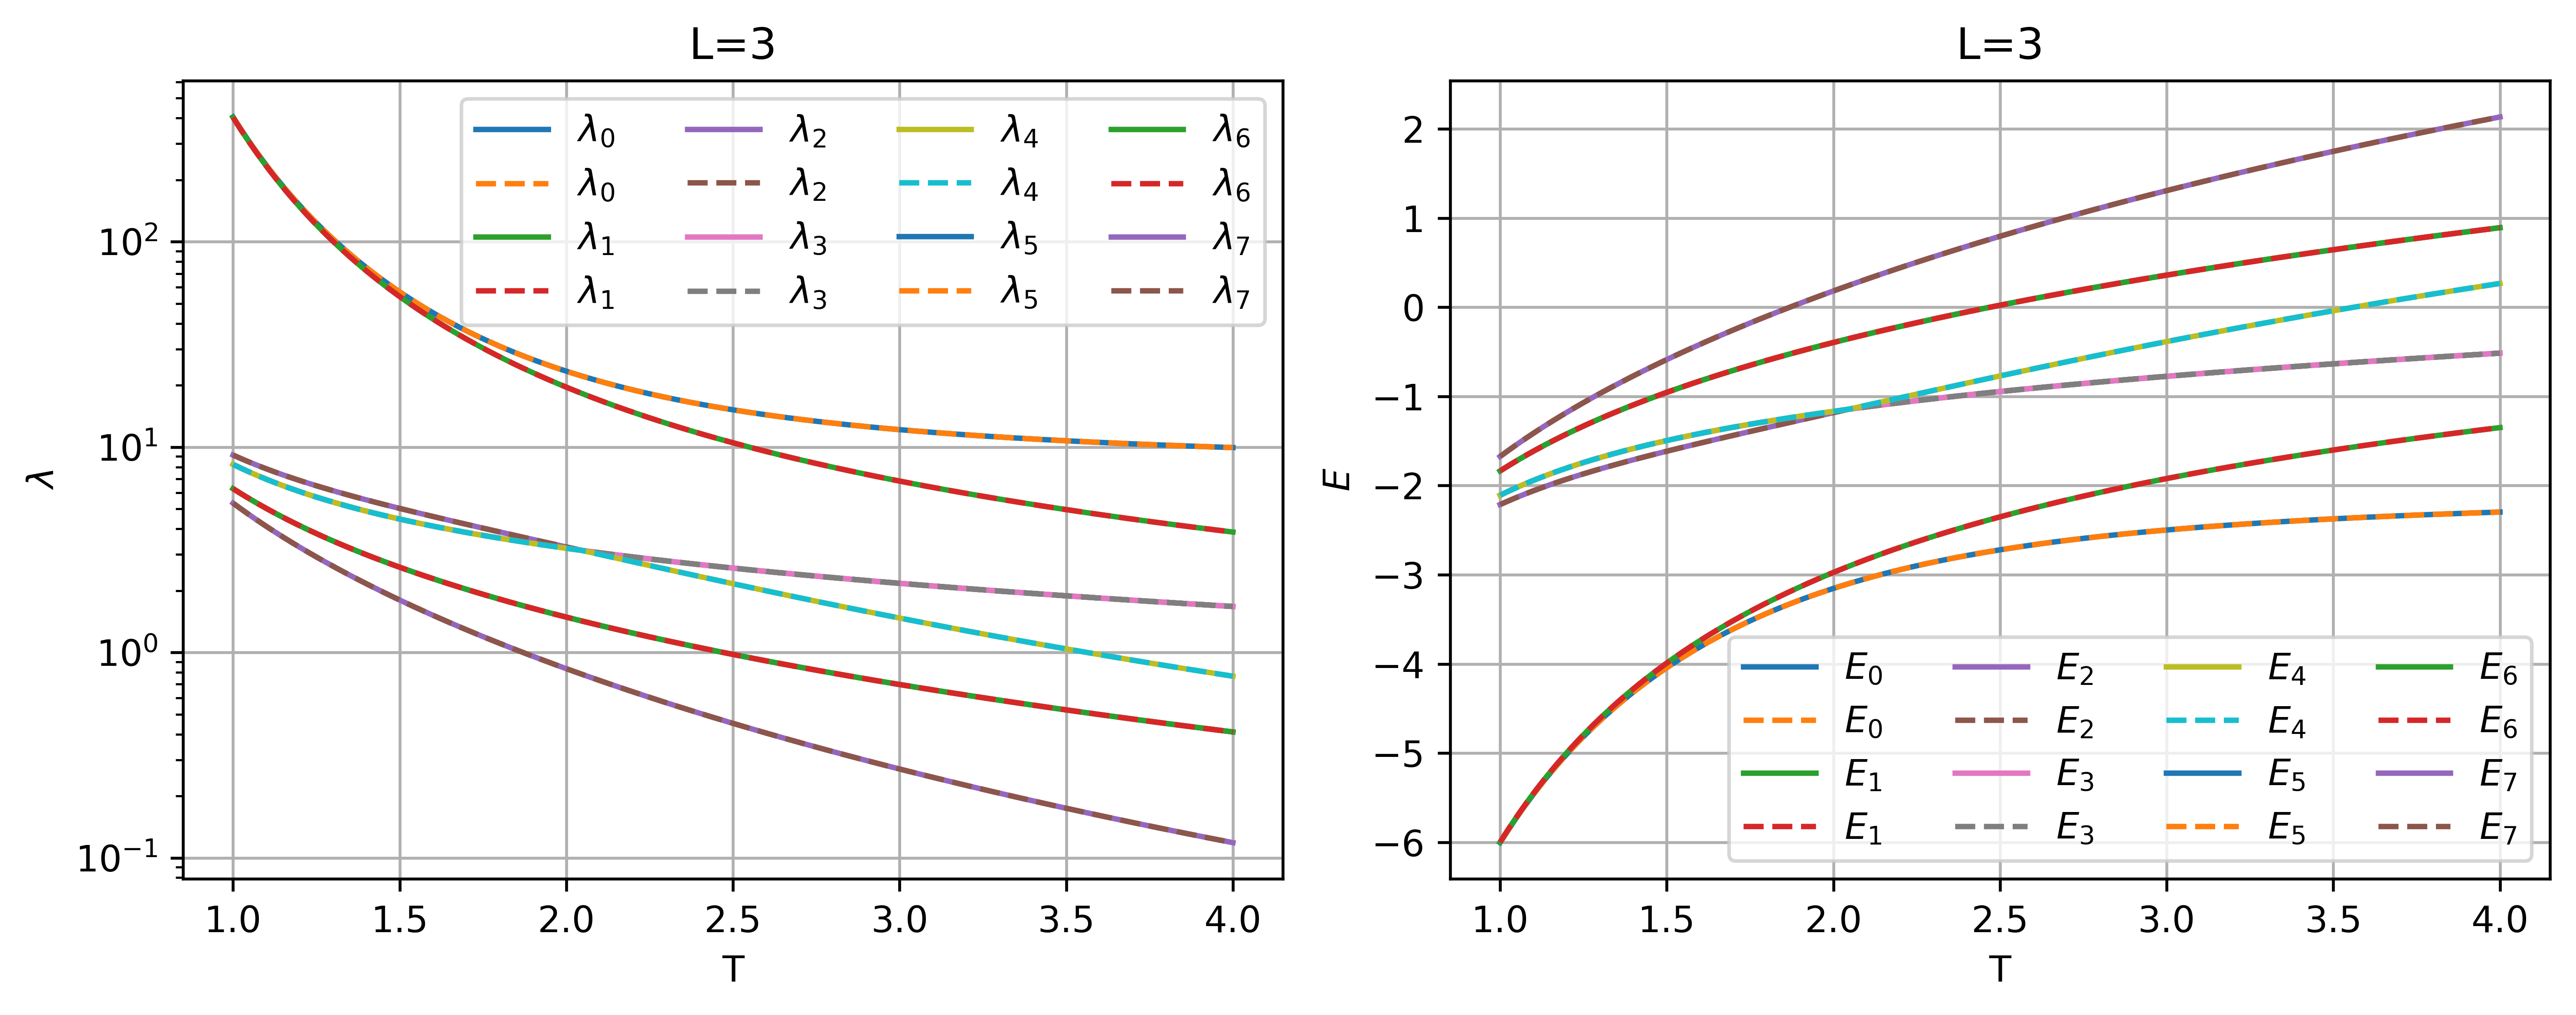

In [8]:
def get_T_3(J,B,beta):
    return np.exp(beta.reshape(-1,1,1) *  np.array(
                    [[3*B + 6*J, 2*B + 2*J, 2*B + 2*J, B, 2*B + 2*J, B, B, 0],
                    [2*B + 2*J, B + 2*J, B - 2*J, 0, B - 2*J, 0, -4*J, -B],
                    [2*B + 2*J, B - 2*J, B + 2*J, 0, B - 2*J, -4*J, 0, -B],
                    [B, 0, 0, -B + 2*J, -4*J, -B - 2*J, -B - 2*J, -2*B + 2*J],
                    [2*B + 2*J, B - 2*J, B - 2*J, -4*J, B + 2*J, 0, 0, -B],
                    [B, 0, -4*J, -B - 2*J, 0, -B + 2*J, -B - 2*J, -2*B + 2*J],
                    [B, -4*J, 0, -B - 2*J, 0, -B - 2*J, -B + 2*J, -2*B + 2*J],
                    [0, -B, -B, -2*B + 2*J, -B, -2*B + 2*J, -2*B + 2*J, -3*B + 6*J]]))

T_3 = get_T_3(J,B,beta)
w_3 = np.linalg.eigvalsh(T_3)
w_3_2 = get_eigval(3,beta,J)
print(np.allclose(w_3_2,w_3))
plt.figure(figsize = (10,4),dpi = 600)
plt.subplot(1,2,1)
for i in range(8):
    plt.plot(t,w_3[:,-(i+1)],label = f'$\lambda_{i}$')
    plt.plot(t,w_3_2[:,-(i+1)],'--',label = f'$\lambda_{i}$')
plt.yscale('log')
plt.xlabel('T')
plt.ylabel(r'$\lambda$')
plt.title('L=3')
plt.grid()
plt.legend(loc=1,ncol=4)
E_3 = -np.log(w_3)
E_3_2 = -np.log(w_3_2)
plt.subplot(1,2,2)
for i in range(8):
    plt.plot(t,E_3[:,-(i+1)],label = f'$E_{i}$')
    plt.plot(t,E_3_2[:,-(i+1)],'--',label = f'$E_{i}$')
plt.xlabel('T')
plt.ylabel('$E$')
plt.title('L=3')
plt.grid()
plt.legend(loc = 4,ncol=4)
plt.tight_layout()
plt.show()

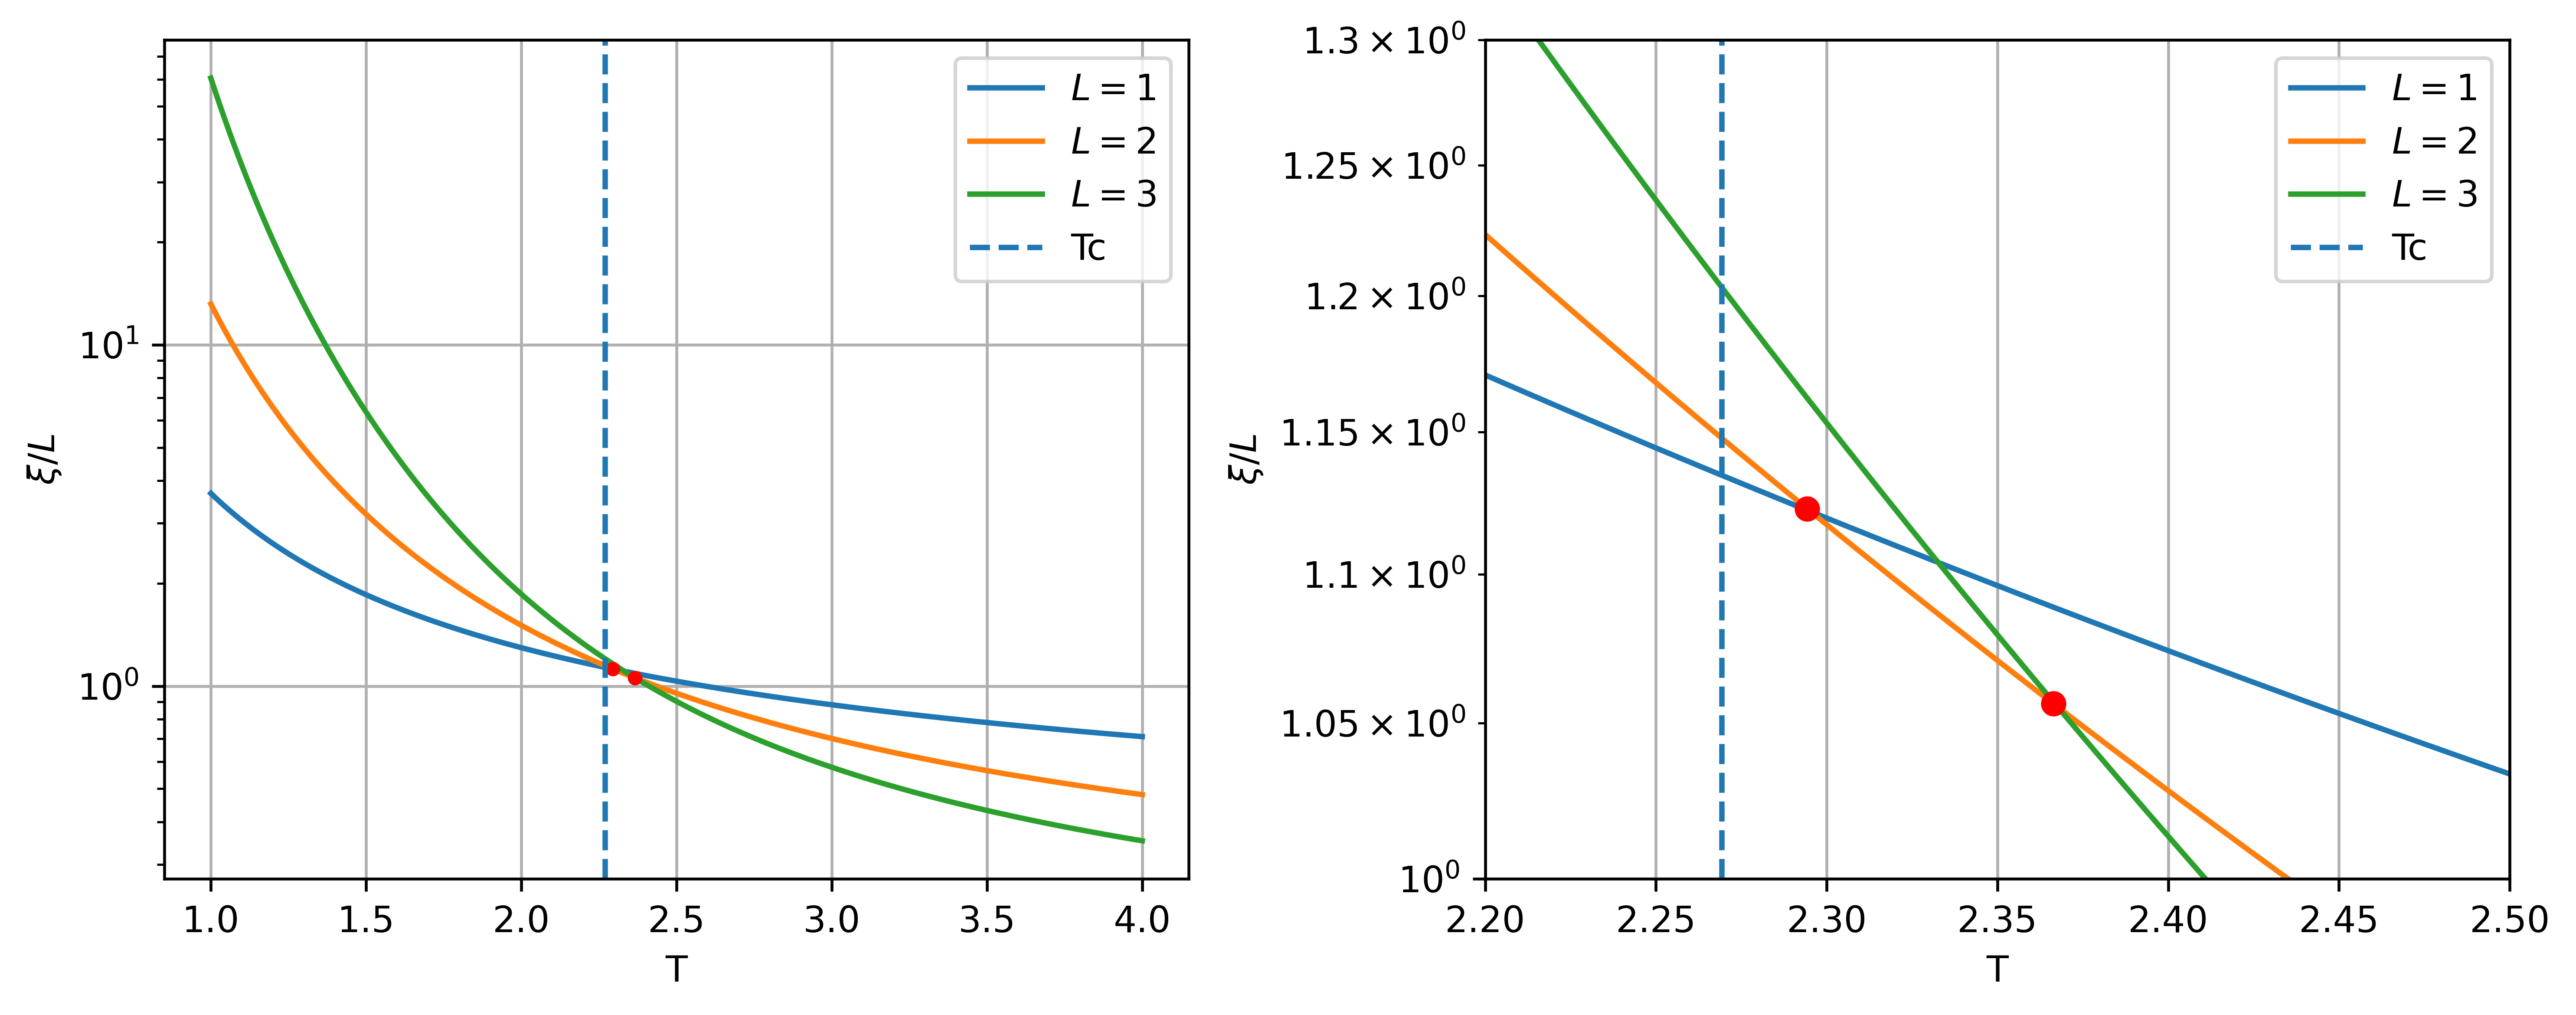

In [9]:
Corr_len_3 = 1/(E_3[:,-2]-E_3[:,-1])/3
T_star = t[np.argmin(np.abs(Corr_len_2-Corr_len_3))]
plt.figure(figsize = (10,4),dpi = 600)
plt.subplot(1,2,1)
plt.plot(t,Corr_len_1,label = r'$L=1$')
plt.plot(t,Corr_len_2,label = r'$L=2$')
plt.plot(t,Corr_len_3,label = r'$L=3$')
plt.plot(t[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         Corr_len_2[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         '.r')
plt.plot(t[np.argmin(np.abs(Corr_len_2-Corr_len_3))],
         Corr_len_2[np.argmin(np.abs(Corr_len_2-Corr_len_3))],
         '.r')
plt.axvline(x=Tc,ls='--',label = 'Tc')
plt.xlabel('T')
plt.ylabel(r'$\xi/L$')
plt.yscale('log')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(t,Corr_len_1,label = r'$L=1$')
plt.plot(t,Corr_len_2,label = r'$L=2$')
plt.plot(t,Corr_len_3,label = r'$L=3$')
plt.plot(t[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         Corr_len_2[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         'or')
plt.plot(t[np.argmin(np.abs(Corr_len_2-Corr_len_3))],
         Corr_len_2[np.argmin(np.abs(Corr_len_2-Corr_len_3))],
         'or')
plt.axvline(x=Tc,ls='--',label = 'Tc')
plt.xlabel('T')
plt.ylabel(r'$\xi/L$')
plt.yscale('log')
plt.xlim(2.2,2.5)
plt.ylim(1,1.3)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

# L=4
$$\displaystyle \left[\begin{array}{cccccccccccccccc}e^{4 \beta \left(B + 2 J\right)} & e^{\beta \left(3 B + 4 J\right)} & e^{\beta \left(3 B + 4 J\right)} & e^{2 \beta \left(B + J\right)} & e^{\beta \left(3 B + 4 J\right)} & e^{2 B \beta} & e^{2 \beta \left(B + J\right)} & e^{B \beta} & e^{\beta \left(3 B + 4 J\right)} & e^{2 \beta \left(B + J\right)} & e^{2 B \beta} & e^{B \beta} & e^{2 \beta \left(B + J\right)} & e^{B \beta} & e^{B \beta} & 1\\e^{\beta \left(3 B + 4 J\right)} & e^{2 \beta \left(B + 2 J\right)} & e^{2 B \beta} & e^{\beta \left(B + 2 J\right)} & e^{2 B \beta} & e^{B \beta} & e^{\beta \left(B - 2 J\right)} & 1 & e^{2 B \beta} & e^{\beta \left(B + 2 J\right)} & e^{\beta \left(B - 4 J\right)} & 1 & e^{\beta \left(B - 2 J\right)} & 1 & e^{- 4 J \beta} & e^{- B \beta}\\e^{\beta \left(3 B + 4 J\right)} & e^{2 B \beta} & e^{2 \beta \left(B + 2 J\right)} & e^{\beta \left(B + 2 J\right)} & e^{2 B \beta} & e^{\beta \left(B - 4 J\right)} & e^{\beta \left(B + 2 J\right)} & 1 & e^{2 B \beta} & e^{\beta \left(B - 2 J\right)} & e^{B \beta} & 1 & e^{\beta \left(B - 2 J\right)} & e^{- 4 J \beta} & 1 & e^{- B \beta}\\e^{2 \beta \left(B + J\right)} & e^{\beta \left(B + 2 J\right)} & e^{\beta \left(B + 2 J\right)} & e^{4 J \beta} & e^{\beta \left(B - 2 J\right)} & e^{- 2 J \beta} & 1 & e^{\beta \left(- B + 2 J\right)} & e^{\beta \left(B - 2 J\right)} & 1 & e^{- 2 J \beta} & e^{\beta \left(- B + 2 J\right)} & e^{- 4 J \beta} & e^{\beta \left(- B - 2 J\right)} & e^{\beta \left(- B - 2 J\right)} & e^{- 2 \beta \left(B - J\right)}\\e^{\beta \left(3 B + 4 J\right)} & e^{2 B \beta} & e^{2 B \beta} & e^{\beta \left(B - 2 J\right)} & e^{2 \beta \left(B + 2 J\right)} & e^{B \beta} & e^{\beta \left(B + 2 J\right)} & 1 & e^{2 B \beta} & e^{\beta \left(B - 2 J\right)} & e^{\beta \left(B - 4 J\right)} & e^{- 4 J \beta} & e^{\beta \left(B + 2 J\right)} & 1 & 1 & e^{- B \beta}\\e^{2 B \beta} & e^{B \beta} & e^{\beta \left(B - 4 J\right)} & e^{- 2 J \beta} & e^{B \beta} & 1 & e^{- 2 J \beta} & e^{- B \beta} & e^{\beta \left(B - 4 J\right)} & e^{- 2 J \beta} & e^{- 8 J \beta} & e^{\beta \left(- B - 4 J\right)} & e^{- 2 J \beta} & e^{- B \beta} & e^{\beta \left(- B - 4 J\right)} & e^{- 2 B \beta}\\e^{2 \beta \left(B + J\right)} & e^{\beta \left(B - 2 J\right)} & e^{\beta \left(B + 2 J\right)} & 1 & e^{\beta \left(B + 2 J\right)} & e^{- 2 J \beta} & e^{4 J \beta} & e^{\beta \left(- B + 2 J\right)} & e^{\beta \left(B - 2 J\right)} & e^{- 4 J \beta} & e^{- 2 J \beta} & e^{\beta \left(- B - 2 J\right)} & 1 & e^{\beta \left(- B - 2 J\right)} & e^{\beta \left(- B + 2 J\right)} & e^{- 2 \beta \left(B - J\right)}\\e^{B \beta} & 1 & 1 & e^{\beta \left(- B + 2 J\right)} & 1 & e^{- B \beta} & e^{\beta \left(- B + 2 J\right)} & e^{2 \beta \left(- B + 2 J\right)} & e^{- 4 J \beta} & e^{\beta \left(- B - 2 J\right)} & e^{\beta \left(- B - 4 J\right)} & e^{- 2 B \beta} & e^{\beta \left(- B - 2 J\right)} & e^{- 2 B \beta} & e^{- 2 B \beta} & e^{\beta \left(- 3 B + 4 J\right)}\\e^{\beta \left(3 B + 4 J\right)} & e^{2 B \beta} & e^{2 B \beta} & e^{\beta \left(B - 2 J\right)} & e^{2 B \beta} & e^{\beta \left(B - 4 J\right)} & e^{\beta \left(B - 2 J\right)} & e^{- 4 J \beta} & e^{2 \beta \left(B + 2 J\right)} & e^{\beta \left(B + 2 J\right)} & e^{B \beta} & 1 & e^{\beta \left(B + 2 J\right)} & 1 & 1 & e^{- B \beta}\\e^{2 \beta \left(B + J\right)} & e^{\beta \left(B + 2 J\right)} & e^{\beta \left(B - 2 J\right)} & 1 & e^{\beta \left(B - 2 J\right)} & e^{- 2 J \beta} & e^{- 4 J \beta} & e^{\beta \left(- B - 2 J\right)} & e^{\beta \left(B + 2 J\right)} & e^{4 J \beta} & e^{- 2 J \beta} & e^{\beta \left(- B + 2 J\right)} & 1 & e^{\beta \left(- B + 2 J\right)} & e^{\beta \left(- B - 2 J\right)} & e^{- 2 \beta \left(B - J\right)}\\e^{2 B \beta} & e^{\beta \left(B - 4 J\right)} & e^{B \beta} & e^{- 2 J \beta} & e^{\beta \left(B - 4 J\right)} & e^{- 8 J \beta} & e^{- 2 J \beta} & e^{\beta \left(- B - 4 J\right)} & e^{B \beta} & e^{- 2 J \beta} & 1 & e^{- B \beta} & e^{- 2 J \beta} & e^{\beta \left(- B - 4 J\right)} & e^{- B \beta} & e^{- 2 B \beta}\\e^{B \beta} & 1 & 1 & e^{\beta \left(- B + 2 J\right)} & e^{- 4 J \beta} & e^{\beta \left(- B - 4 J\right)} & e^{\beta \left(- B - 2 J\right)} & e^{- 2 B \beta} & 1 & e^{\beta \left(- B + 2 J\right)} & e^{- B \beta} & e^{2 \beta \left(- B + 2 J\right)} & e^{\beta \left(- B - 2 J\right)} & e^{- 2 B \beta} & e^{- 2 B \beta} & e^{\beta \left(- 3 B + 4 J\right)}\\e^{2 \beta \left(B + J\right)} & e^{\beta \left(B - 2 J\right)} & e^{\beta \left(B - 2 J\right)} & e^{- 4 J \beta} & e^{\beta \left(B + 2 J\right)} & e^{- 2 J \beta} & 1 & e^{\beta \left(- B - 2 J\right)} & e^{\beta \left(B + 2 J\right)} & 1 & e^{- 2 J \beta} & e^{\beta \left(- B - 2 J\right)} & e^{4 J \beta} & e^{\beta \left(- B + 2 J\right)} & e^{\beta \left(- B + 2 J\right)} & e^{- 2 \beta \left(B - J\right)}\\e^{B \beta} & 1 & e^{- 4 J \beta} & e^{\beta \left(- B - 2 J\right)} & 1 & e^{- B \beta} & e^{\beta \left(- B - 2 J\right)} & e^{- 2 B \beta} & 1 & e^{\beta \left(- B + 2 J\right)} & e^{\beta \left(- B - 4 J\right)} & e^{- 2 B \beta} & e^{\beta \left(- B + 2 J\right)} & e^{2 \beta \left(- B + 2 J\right)} & e^{- 2 B \beta} & e^{\beta \left(- 3 B + 4 J\right)}\\e^{B \beta} & e^{- 4 J \beta} & 1 & e^{\beta \left(- B - 2 J\right)} & 1 & e^{\beta \left(- B - 4 J\right)} & e^{\beta \left(- B + 2 J\right)} & e^{- 2 B \beta} & 1 & e^{\beta \left(- B - 2 J\right)} & e^{- B \beta} & e^{- 2 B \beta} & e^{\beta \left(- B + 2 J\right)} & e^{- 2 B \beta} & e^{2 \beta \left(- B + 2 J\right)} & e^{\beta \left(- 3 B + 4 J\right)}\\1 & e^{- B \beta} & e^{- B \beta} & e^{- 2 \beta \left(B - J\right)} & e^{- B \beta} & e^{- 2 B \beta} & e^{- 2 \beta \left(B - J\right)} & e^{\beta \left(- 3 B + 4 J\right)} & e^{- B \beta} & e^{- 2 \beta \left(B - J\right)} & e^{- 2 B \beta} & e^{\beta \left(- 3 B + 4 J\right)} & e^{- 2 \beta \left(B - J\right)} & e^{\beta \left(- 3 B + 4 J\right)} & e^{\beta \left(- 3 B + 4 J\right)} & e^{4 \beta \left(- B + 2 J\right)}\end{array}\right]$$

True


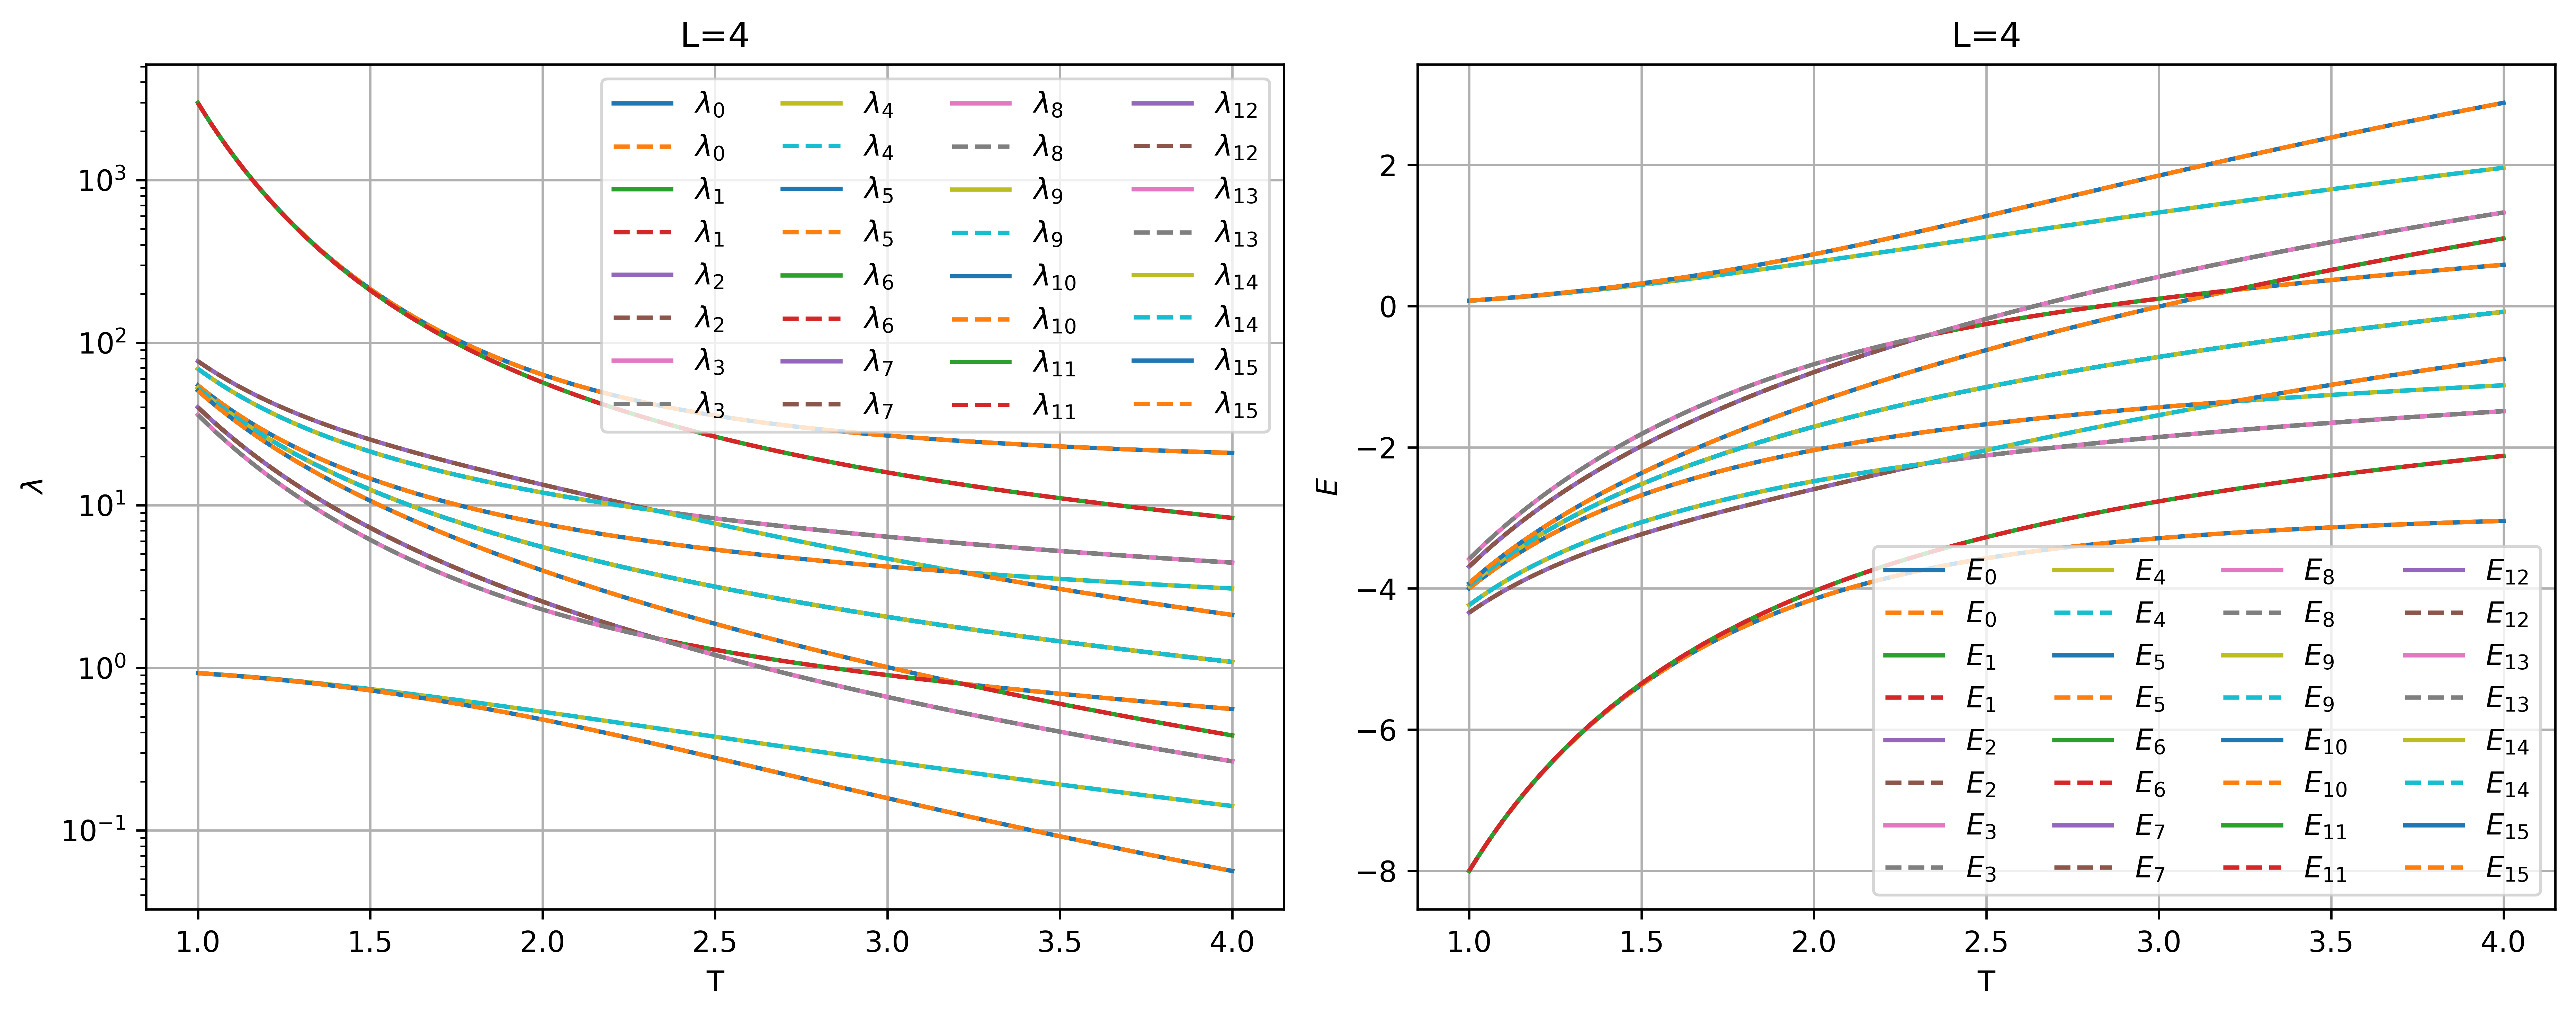

In [10]:
def get_T_4(J,B,beta):
    return np.exp(beta.reshape(-1,1,1) *  np.array(
            [[4*B + 8*J, 3*B + 4*J, 3*B + 4*J, 2*B + 2*J, 3*B + 4*J, 2*B, 2*B + 2*J, B, 3*B + 4*J, 2*B + 2*J, 2*B, B, 2*B + 2*J, B, B, 0],
            [3*B + 4*J, 2*B + 4*J, 2*B, B + 2*J, 2*B, B, B - 2*J, 0, 2*B, B + 2*J, B - 4*J, 0, B - 2*J, 0, -4*J, -B],
            [3*B + 4*J, 2*B, 2*B + 4*J, B + 2*J, 2*B, B - 4*J, B + 2*J, 0, 2*B, B - 2*J, B, 0, B - 2*J, -4*J, 0, -B],
            [2*B + 2*J, B + 2*J, B + 2*J, 4*J, B - 2*J, -2*J, 0, -B + 2*J, B - 2*J, 0, -2*J, -B + 2*J, -4*J, -B - 2*J, -B - 2*J, -2*B + 2*J],
            [3*B + 4*J, 2*B, 2*B, B - 2*J, 2*B + 4*J, B, B + 2*J, 0, 2*B, B - 2*J, B - 4*J, -4*J, B + 2*J, 0, 0, -B],
            [2*B, B, B - 4*J, -2*J, B, 0, -2*J, -B, B - 4*J, -2*J, -8*J, -B - 4*J, -2*J, -B, -B - 4*J, -2*B],
            [2*B + 2*J, B - 2*J, B + 2*J, 0, B + 2*J, -2*J, 4*J, -B + 2*J, B - 2*J, -4*J, -2*J, -B - 2*J, 0, -B - 2*J, -B + 2*J, -2*B + 2*J],
            [B, 0, 0, -B + 2*J, 0, -B, -B + 2*J, -2*B + 4*J, -4*J, -B - 2*J, -B - 4*J, -2*B, -B - 2*J, -2*B, -2*B, -3*B + 4*J],
            [3*B + 4*J, 2*B, 2*B, B - 2*J, 2*B, B - 4*J, B - 2*J, -4*J, 2*B + 4*J, B + 2*J, B, 0, B + 2*J, 0, 0, -B],
            [2*B + 2*J, B + 2*J, B - 2*J, 0, B - 2*J, -2*J, -4*J, -B - 2*J, B + 2*J, 4*J, -2*J, -B + 2*J, 0, -B + 2*J, -B - 2*J, -2*B + 2*J],
            [2*B, B - 4*J, B, -2*J, B - 4*J, -8*J, -2*J, -B - 4*J, B, -2*J, 0, -B, -2*J, -B - 4*J, -B, -2*B],
            [B, 0, 0, -B + 2*J, -4*J, -B - 4*J, -B - 2*J, -2*B, 0, -B + 2*J, -B, -2*B + 4*J, -B - 2*J, -2*B, -2*B, -3*B + 4*J],
            [2*B + 2*J, B - 2*J, B - 2*J, -4*J, B + 2*J, -2*J, 0, -B - 2*J, B + 2*J, 0, -2*J, -B - 2*J, 4*J, -B + 2*J, -B + 2*J, -2*B + 2*J],
            [B, 0, -4*J, -B - 2*J, 0, -B, -B - 2*J, -2*B, 0, -B + 2*J, -B - 4*J, -2*B, -B + 2*J, -2*B + 4*J, -2*B, -3*B + 4*J],
            [B, -4*J, 0, -B - 2*J, 0, -B - 4*J, -B + 2*J, -2*B, 0, -B - 2*J, -B, -2*B, -B + 2*J, -2*B, -2*B + 4*J, -3*B + 4*J],
            [0, -B, -B, -2*B + 2*J, -B, -2*B, -2*B + 2*J, -3*B + 4*J, -B, -2*B + 2*J, -2*B, -3*B + 4*J, -2*B + 2*J, -3*B + 4*J, -3*B + 4*J, -4*B + 8*J]]))

T_4 = get_T_4(J,B,beta)
w_4 = np.linalg.eigvalsh(T_4)
w_4_2 = get_eigval(4,beta,J)
print(np.allclose(w_4_2,w_4))
plt.figure(figsize = (12.5,5),dpi = 600)
plt.subplot(1,2,1)
for i in range(16):
    plt.plot(t,w_4[:,-(i+1)],label = f'$\lambda_{{{i}}}$')
    plt.plot(t,w_4_2[:,-(i+1)],'--',label = f'$\lambda_{{{i}}}$')
plt.yscale('log')
plt.xlabel('T')
plt.ylabel(r'$\lambda$')
plt.title('L=4')
plt.grid()
plt.legend(loc=1,ncol=4)
E_4 = -np.log(w_4)
E_4_2 = -np.log(w_4_2)
plt.subplot(1,2,2)
for i in range(16):
    plt.plot(t,E_4[:,-(i+1)],label = f'$E_{{{i}}}$')
    plt.plot(t,E_4_2[:,-(i+1)],'--',label = f'$E_{{{i}}}$')
plt.xlabel('T')
plt.ylabel('$E$')
plt.title('L=4')
plt.grid()
plt.legend(loc = 4,ncol=4)
plt.tight_layout()
plt.show()

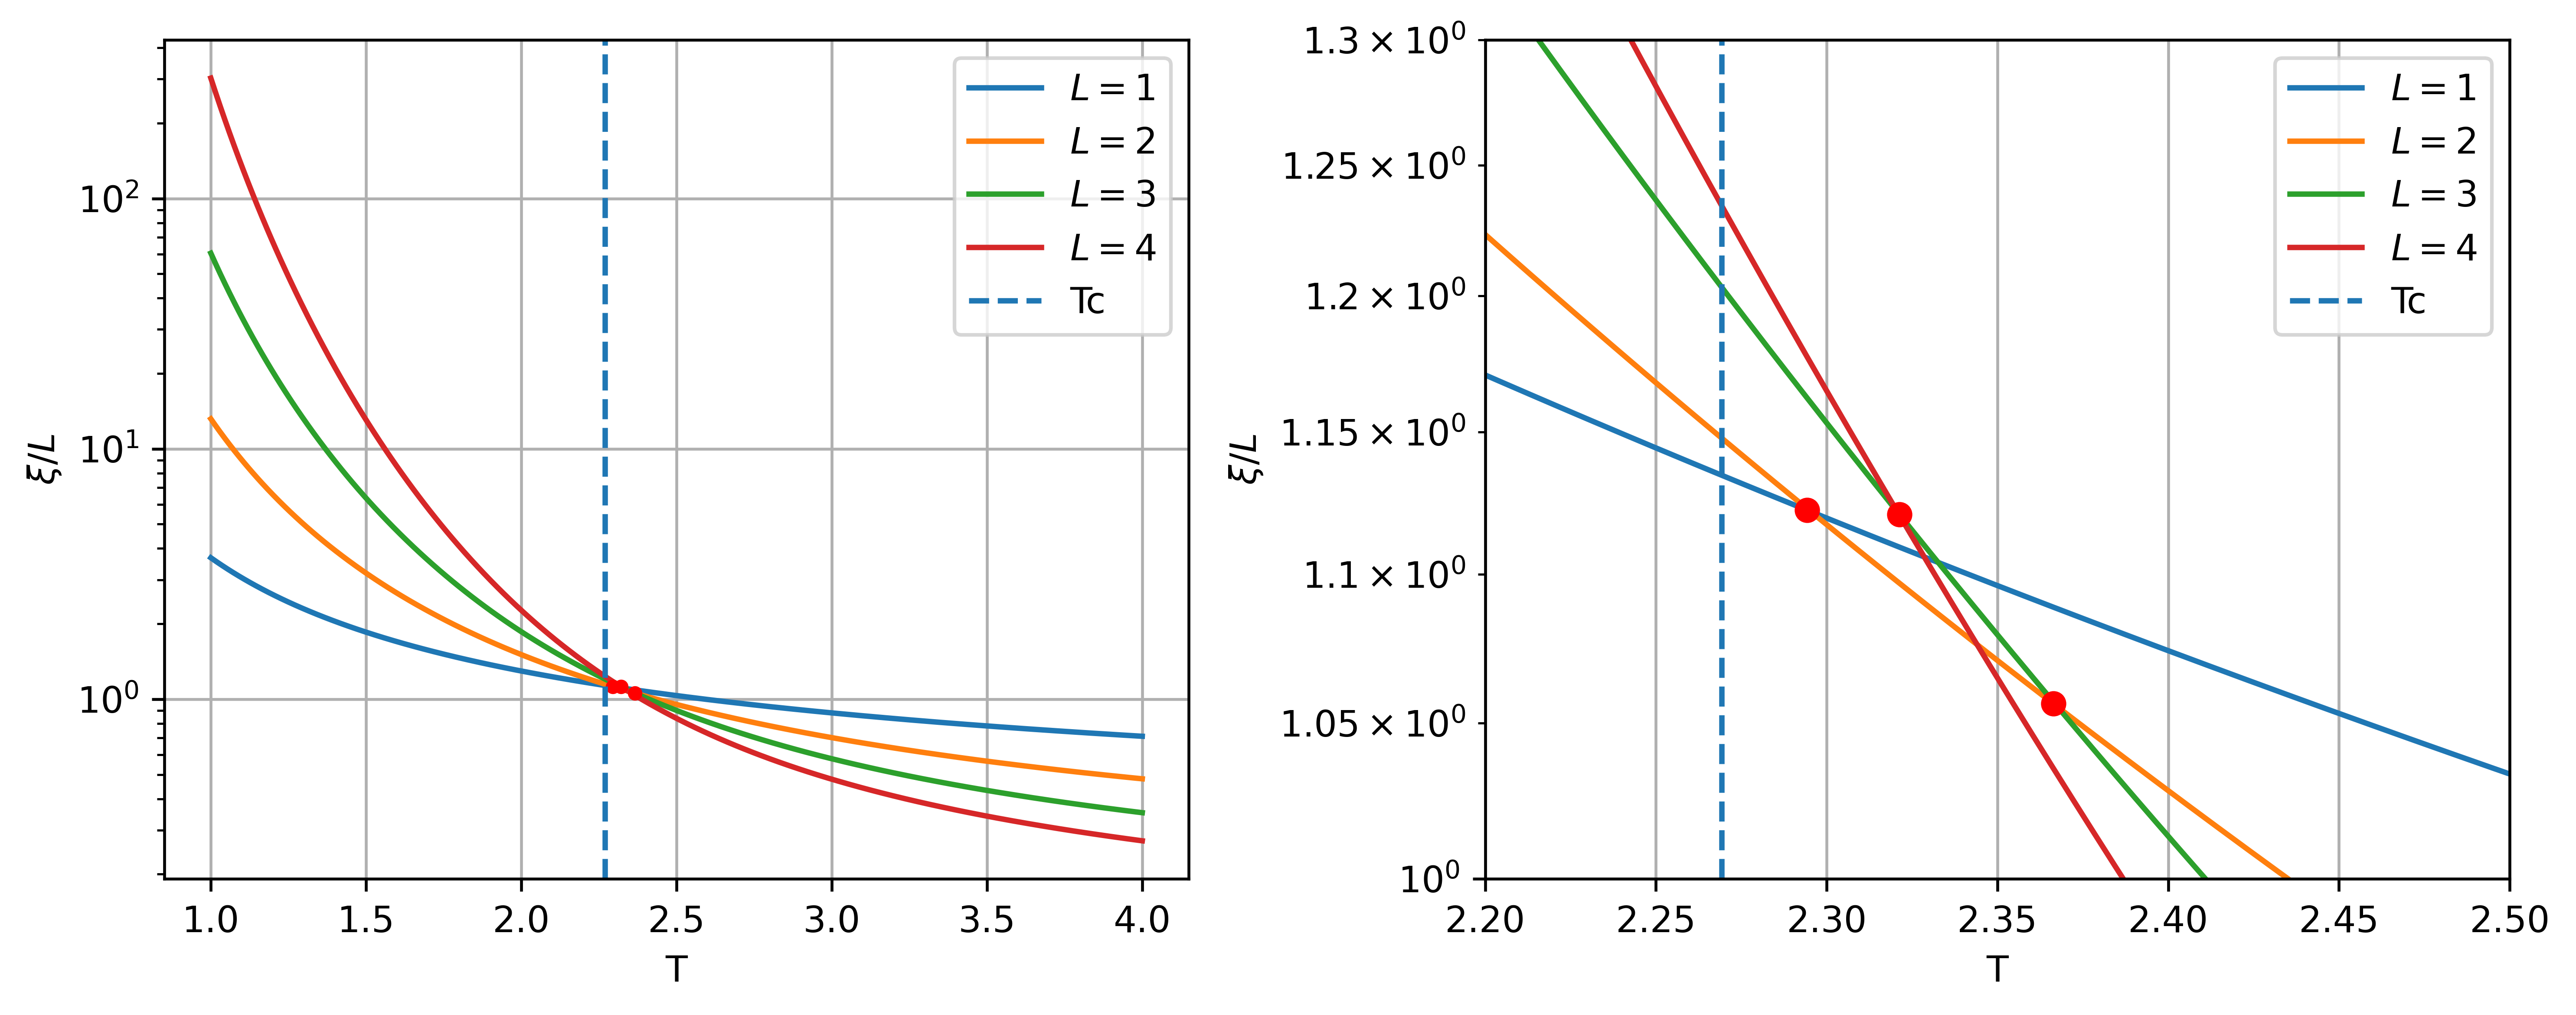

In [11]:
Corr_len_4 = 1/(E_4[:,-2]-E_4[:,-1])/4
T_star = t[np.argmin(np.abs(Corr_len_3-Corr_len_4))]
plt.figure(figsize = (10,4),dpi = 600)
plt.subplot(1,2,1)
plt.plot(t,Corr_len_1,label = r'$L=1$')
plt.plot(t,Corr_len_2,label = r'$L=2$')
plt.plot(t,Corr_len_3,label = r'$L=3$')
plt.plot(t,Corr_len_4,label = r'$L=4$')
plt.plot(t[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         Corr_len_1[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         '.r')
plt.plot(t[np.argmin(np.abs(Corr_len_2-Corr_len_3))],
         Corr_len_2[np.argmin(np.abs(Corr_len_2-Corr_len_3))],
         '.r')
plt.plot(t[np.argmin(np.abs(Corr_len_3-Corr_len_4))],
         Corr_len_3[np.argmin(np.abs(Corr_len_3-Corr_len_4))],
         '.r')
plt.axvline(x=Tc,ls='--',label = 'Tc')
plt.xlabel('T')
plt.ylabel(r'$\xi/L$')
plt.yscale('log')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(t,Corr_len_1,label = r'$L=1$')
plt.plot(t,Corr_len_2,label = r'$L=2$')
plt.plot(t,Corr_len_3,label = r'$L=3$')
plt.plot(t,Corr_len_4,label = r'$L=4$')
plt.plot(t[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         Corr_len_1[np.argmin(np.abs(Corr_len_1-Corr_len_2))],
         'or')
plt.plot(t[np.argmin(np.abs(Corr_len_2-Corr_len_3))],
         Corr_len_2[np.argmin(np.abs(Corr_len_2-Corr_len_3))],
         'or')
plt.plot(t[np.argmin(np.abs(Corr_len_3-Corr_len_4))],
         Corr_len_3[np.argmin(np.abs(Corr_len_3-Corr_len_4))],
         'or')
plt.axvline(x=Tc,ls='--',label = 'Tc')
plt.xlabel('T')
plt.ylabel(r'$\xi/L$')
plt.yscale('log')
plt.xlim(2.2,2.5)
plt.ylim(1,1.3)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [12]:
J = 1
B = 0
t = np.linspace(2.25,2.4,400)
beta = 1/t
Tc = 2/np.log(1+np.sqrt(2))

In [13]:
%%time
for i in range(2,11):
    exec(f'w_{i} = get_eigval({i},beta,J)')
    exec(f'E_{i} = -np.log(w_{i})')
    exec(f'Corr_len_{i} = 1/(E_{i}[:,-2]-E_{i}[:,-1])/{i}')

CPU times: user 17min 47s, sys: 29.7 s, total: 18min 16s
Wall time: 55.7 s


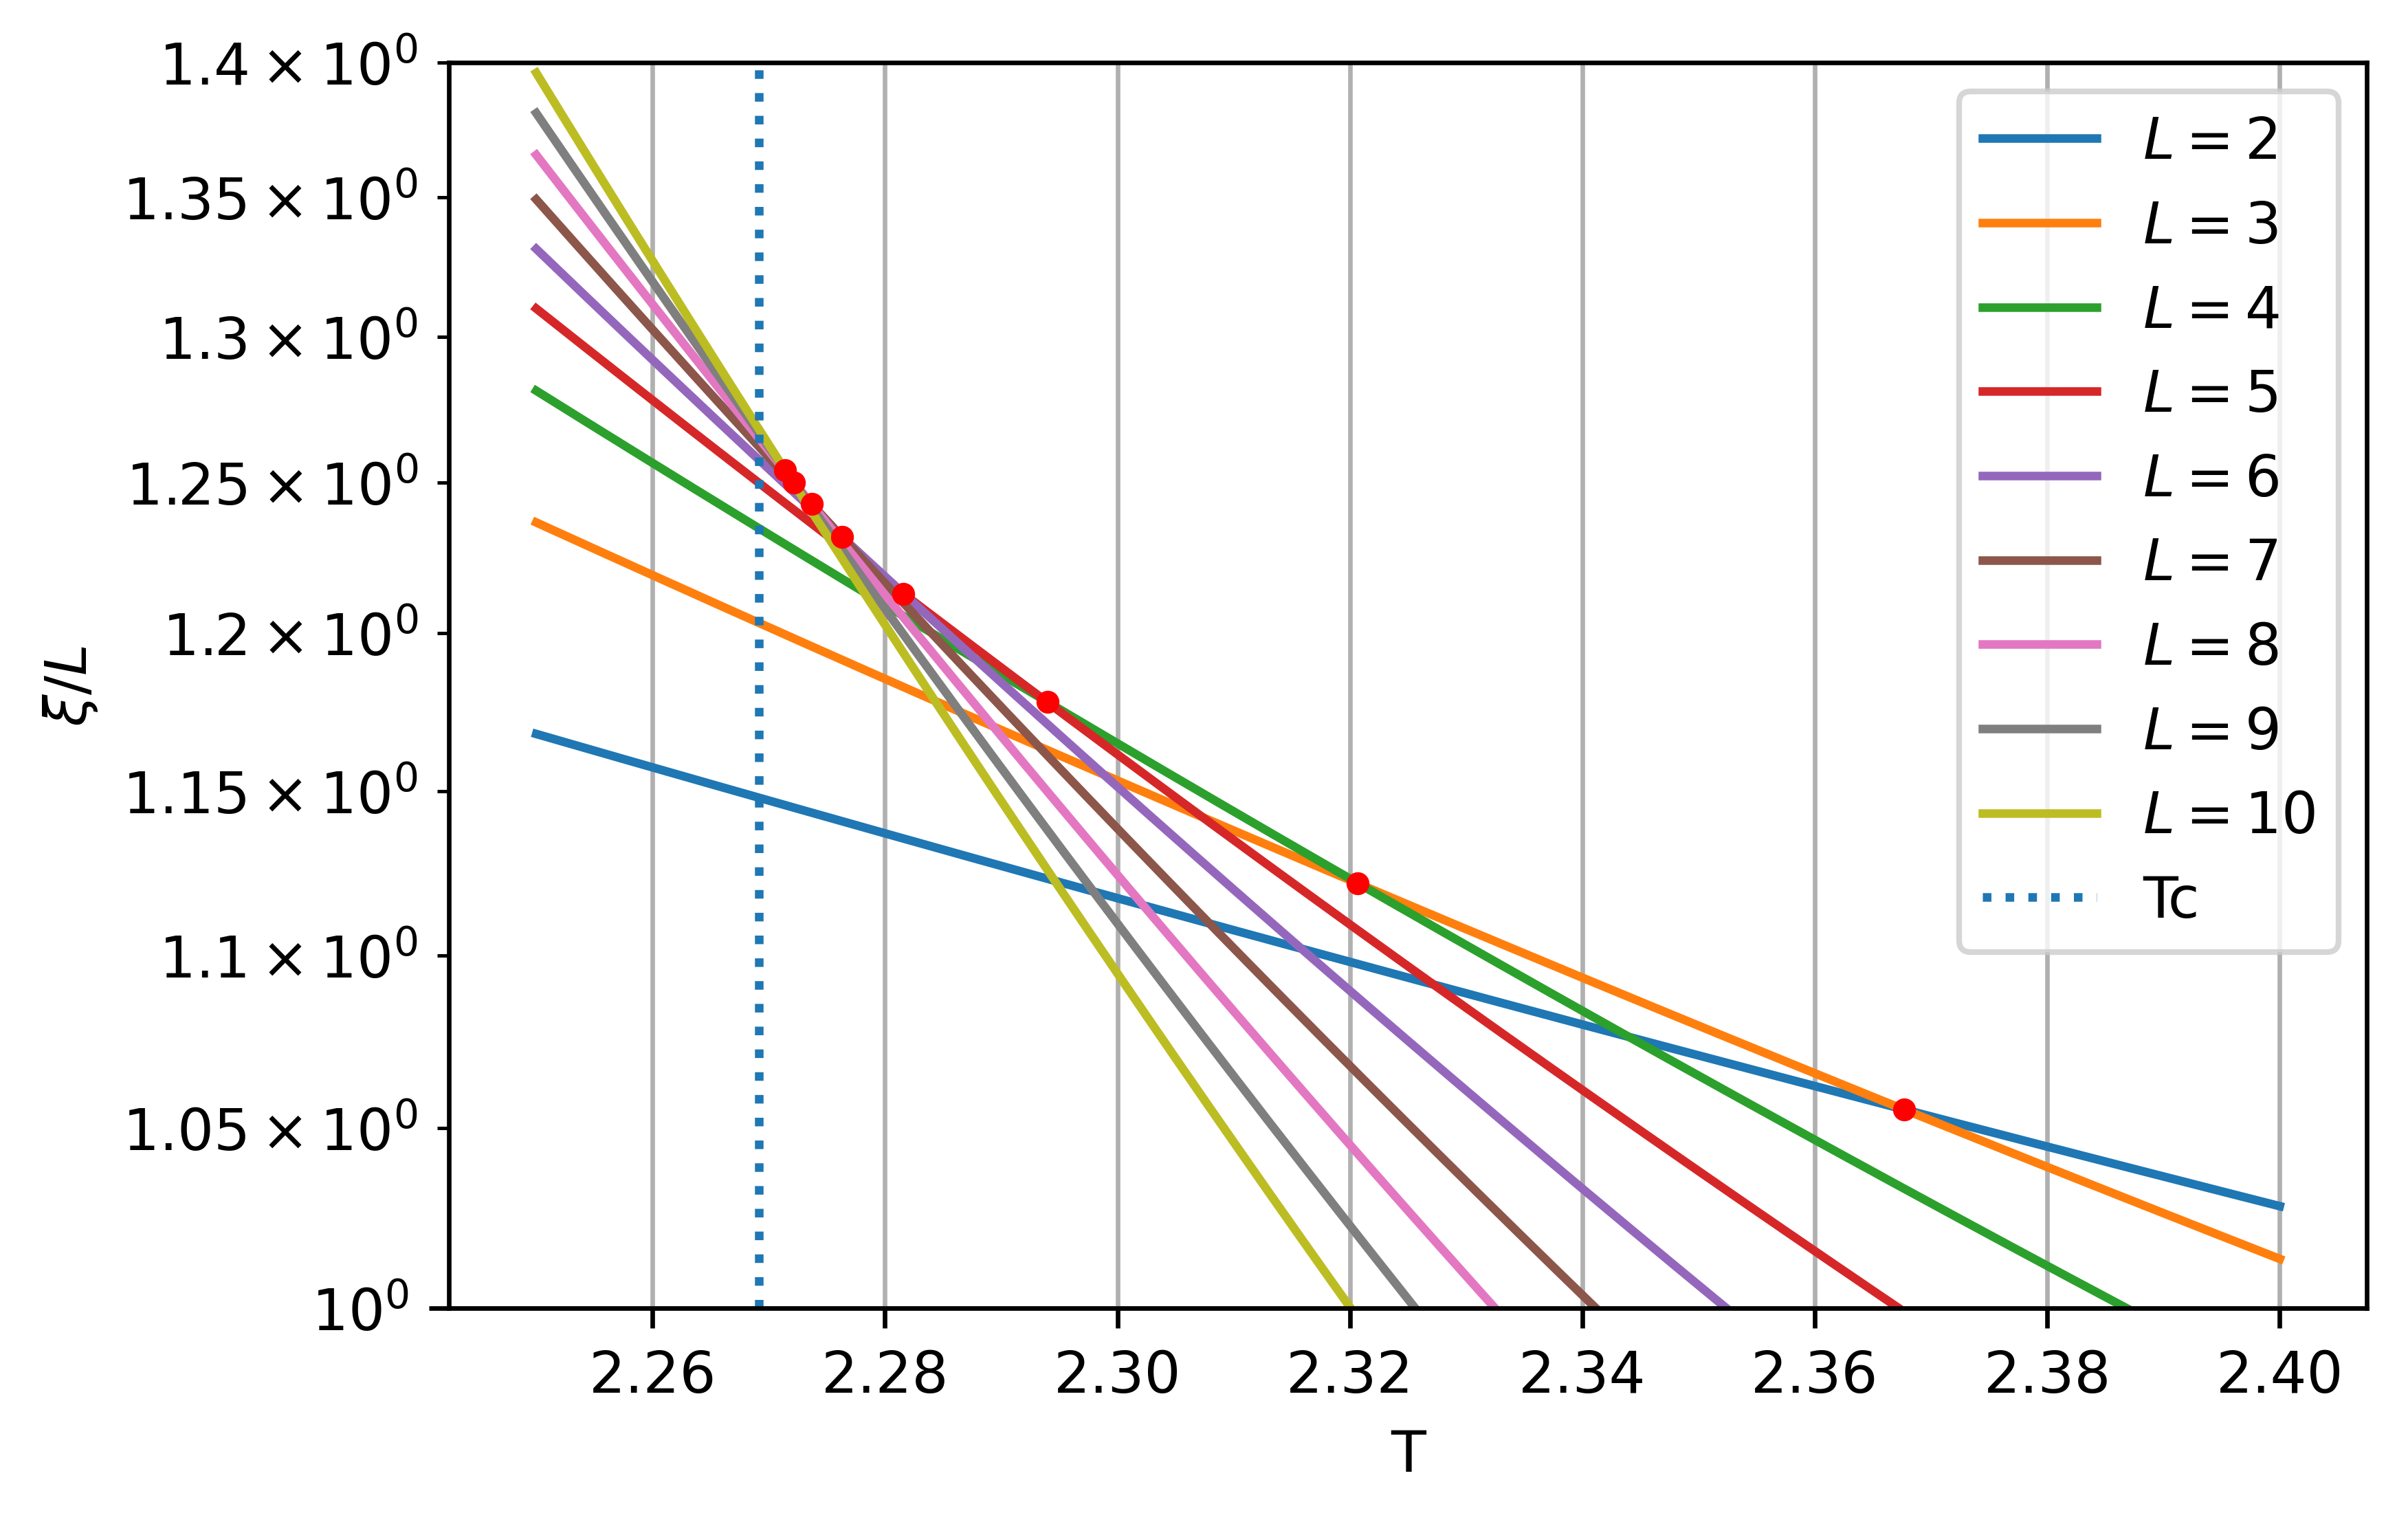

In [14]:
plt.figure(dpi = 600)
for i in range(2,11):
    exec(f"plt.plot(t,Corr_len_{i},label = r'$L={i}$')")
for i in range(2,10):
    exec(f"""plt.plot(t[np.argmin(np.abs(Corr_len_{i}-Corr_len_{i+1}))],
         Corr_len_{i}[np.argmin(np.abs(Corr_len_{i}-Corr_len_{i+1}))],
         '.r')""")
#T_star = t[np.argmin(np.abs(Corr_len_2-Corr_len_3))]
plt.axvline(x=Tc,ls=':',label = 'Tc')
#plt.axvline(x=T_star,label = '$T^*_{1,3}$')
plt.xlabel('T')
plt.ylabel(r'$\xi/L$')
plt.yscale('log')
plt.ylim((1,1.4))
plt.grid()
plt.legend()
plt.show()

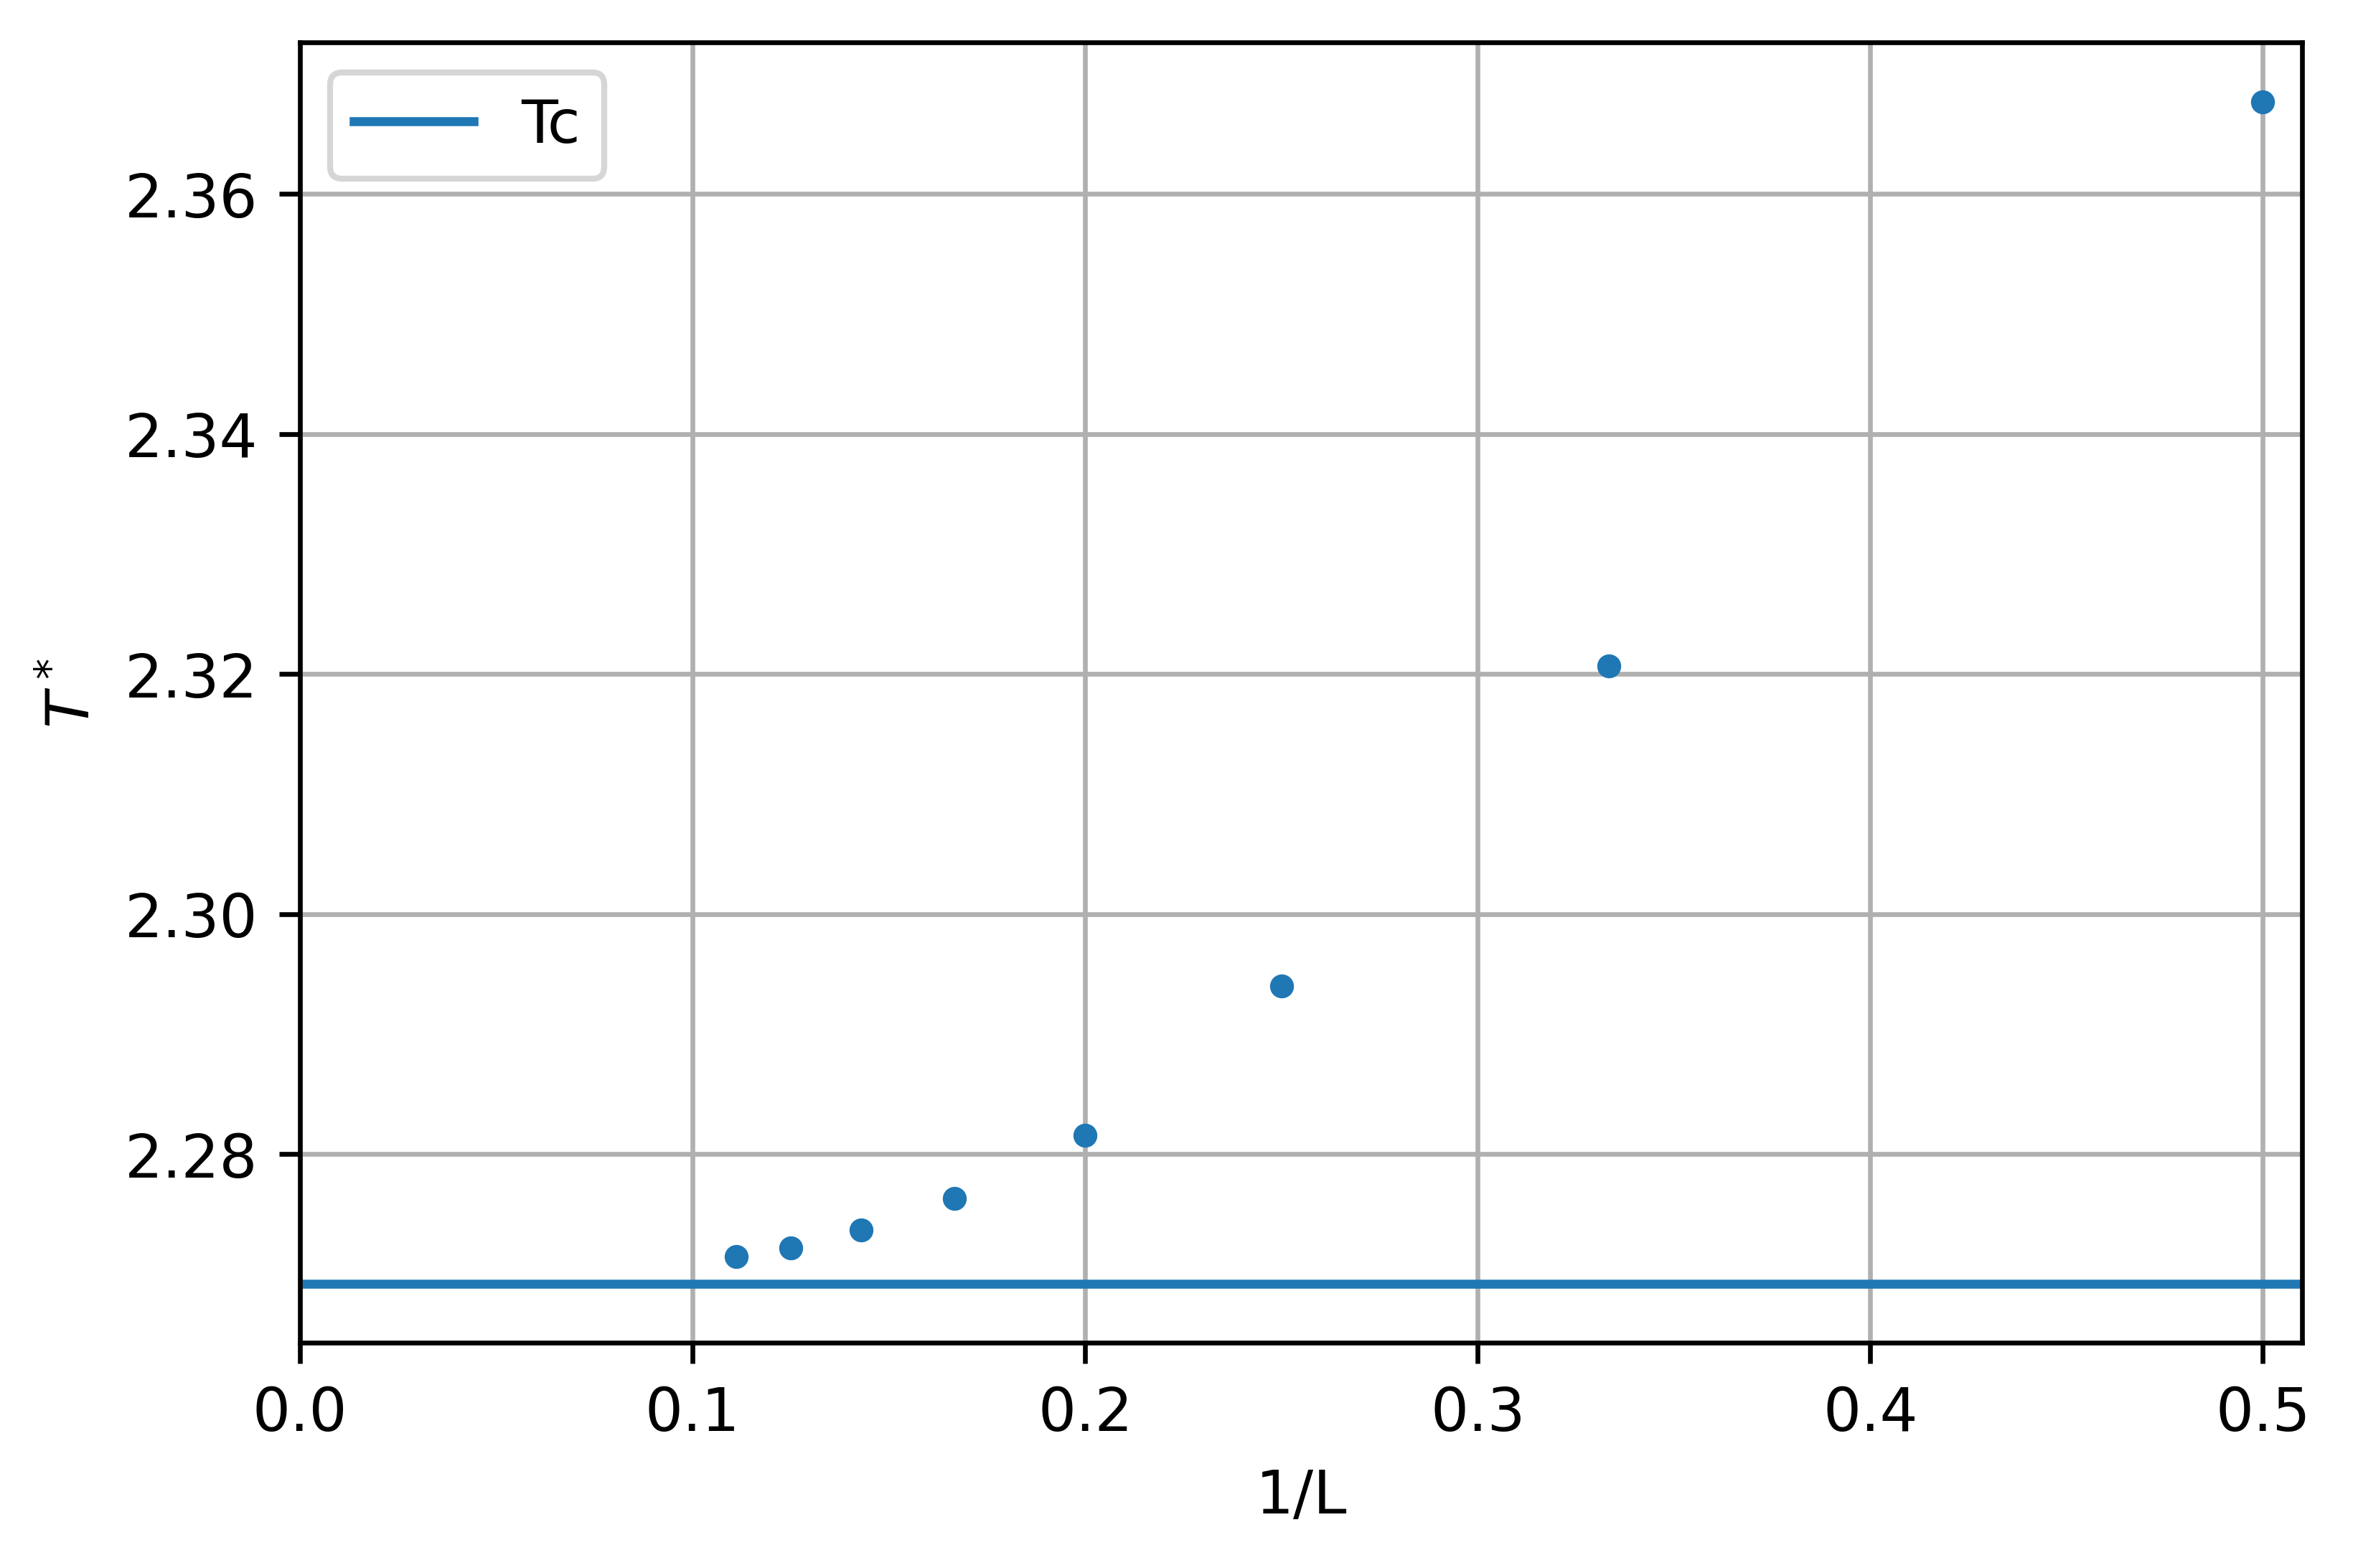

In [15]:
T_star = []
plt.figure(dpi = 600)
for i in range(2,10):
    exec(f'T_star.append(t[np.argmin(np.abs(Corr_len_{i}-Corr_len_{i+1}))])')
#T_star = t[np.argmin(np.abs(Corr_len_2-Corr_len_3))]
plt.axhline(Tc,label = 'Tc')
plt.plot(1/np.arange(2,10),T_star,'.')
#plt.axvline(x=T_star,label = '$T^*_{1,3}$')
plt.xlabel('1/L')
plt.ylabel(r'$T^*$')
plt.xlim(0,0.51)
plt.grid()
plt.legend()
plt.show()

# 產生任意大小的Matrix

In [16]:
L = 5
J,B,beta = sp.symbols('J B beta')
prod = np.array(list(itertools.product([1,-1],repeat=2*L)),dtype='int')
prod = prod.reshape(-1,2,L).transpose(0,2,1)
V1 = -J * np.sum(prod[:,:,0]*prod[:,:,1],axis = 1)
V1 = beta*-V1.reshape(2**L,2**L)
prod = np.array(list(itertools.product([1,-1],repeat=L)),dtype='int')
prod = np.c_[prod,prod[:,0]]
V2 = -B * np.sum(prod[:,:-1], axis = 1)
V2 += -J * np.sum(prod[:,1:]*prod[:,:-1], axis = 1)
V2 = np.diag(V2)
V2_sqrt = beta*(-V2/2)
for i in range(2**L):
    for j in range(2**L):
        V1[i][j] = sp.exp(V1[i][j])
for i in range(2**L):
    V2_sqrt[i][i] = sp.exp(V2_sqrt[i][i])
V1 = sp.Matrix(V1)
V2_sqrt = sp.Matrix(V2_sqrt)
V = sp.simplify(V2_sqrt@V1@V2_sqrt)
npV = np.array(V)
lnV = np.zeros_like(npV)
for i in range(2**L):
    for j in range(2**L):
        lnV[i][j] = (sp.ln(npV[i][j])/beta).expand(force=True)
lnV = sp.Matrix(lnV)
str_V = str(lnV.tolist())
str_V = str_V.replace('], ','],\n')
str_V = str_V.replace('exp','np.exp')
print(f'T_{L} = np.exp(beta.reshape(-1,1,1) *  np.array(\n{str_V}))')

T_5 = np.exp(beta.reshape(-1,1,1) *  np.array(
[[5*B + 10*J, 4*B + 6*J, 4*B + 6*J, 3*B + 4*J, 4*B + 6*J, 3*B + 2*J, 3*B + 4*J, 2*B + 2*J, 4*B + 6*J, 3*B + 2*J, 3*B + 2*J, 2*B, 3*B + 4*J, 2*B, 2*B + 2*J, B, 4*B + 6*J, 3*B + 4*J, 3*B + 2*J, 2*B + 2*J, 3*B + 2*J, 2*B, 2*B, B, 3*B + 4*J, 2*B + 2*J, 2*B, B, 2*B + 2*J, B, B, 0],
[4*B + 6*J, 3*B + 6*J, 3*B + 2*J, 2*B + 4*J, 3*B + 2*J, 2*B + 2*J, 2*B, B + 2*J, 3*B + 2*J, 2*B + 2*J, 2*B - 2*J, B, 2*B, B, B - 2*J, 0, 3*B + 2*J, 2*B + 4*J, 2*B - 2*J, B + 2*J, 2*B - 2*J, B, B - 4*J, 0, 2*B, B + 2*J, B - 4*J, 0, B - 2*J, 0, -4*J, -B],
[4*B + 6*J, 3*B + 2*J, 3*B + 6*J, 2*B + 4*J, 3*B + 2*J, 2*B - 2*J, 2*B + 4*J, B + 2*J, 3*B + 2*J, 2*B - 2*J, 2*B + 2*J, B, 2*B, B - 4*J, B + 2*J, 0, 3*B + 2*J, 2*B, 2*B + 2*J, B + 2*J, 2*B - 2*J, B - 4*J, B, 0, 2*B, B - 2*J, B, 0, B - 2*J, -4*J, 0, -B],
[3*B + 4*J, 2*B + 4*J, 2*B + 4*J, B + 6*J, 2*B, B, B + 2*J, 4*J, 2*B, B, B, 2*J, B - 2*J, -2*J, 0, -B + 2*J, 2*B, B + 2*J, B, 4*J, B - 4*J, -2*J, -2*J, -B + 2*J, B - 2

In [17]:
V

Matrix([
[  exp(5*beta*(B + 2*J)), exp(2*beta*(2*B + 3*J)), exp(2*beta*(2*B + 3*J)), exp(beta*(3*B + 4*J)), exp(2*beta*(2*B + 3*J)), exp(beta*(3*B + 2*J)), exp(beta*(3*B + 4*J)),    exp(2*beta*(B + J)), exp(2*beta*(2*B + 3*J)), exp(beta*(3*B + 2*J)), exp(beta*(3*B + 2*J)),          exp(2*B*beta), exp(beta*(3*B + 4*J)),          exp(2*B*beta),    exp(2*beta*(B + J)),              exp(B*beta), exp(2*beta*(2*B + 3*J)), exp(beta*(3*B + 4*J)), exp(beta*(3*B + 2*J)),    exp(2*beta*(B + J)), exp(beta*(3*B + 2*J)),          exp(2*B*beta),          exp(2*B*beta),              exp(B*beta), exp(beta*(3*B + 4*J)),    exp(2*beta*(B + J)),          exp(2*B*beta),              exp(B*beta),    exp(2*beta*(B + J)),              exp(B*beta),              exp(B*beta),                        1],
[exp(2*beta*(2*B + 3*J)),   exp(3*beta*(B + 2*J)),   exp(beta*(3*B + 2*J)), exp(2*beta*(B + 2*J)),   exp(beta*(3*B + 2*J)),   exp(2*beta*(B + J)),         exp(2*B*beta),    exp(beta*(B + 2*J)),   exp(beta*(3*B + 2